# LSSA-2025-I Project Delivery 2

---
# Diseño y Evolución de una Arquitectura de Streaming de Música
## Equipo 2

### Integrantes:

### Santiago Restrepo Rojas - srestreporo@unal.edu.co
### Carlos Santiago Sandoval Casallas - csandovalc@unal.edu.co
### Juan Andres Orozco Velandia - jorozcove@unal.edu.co
### Camilo Andres Cuello Romero - ccuello@unal.edu.co
### Juan Estevan Hunter Malaver - jhunter@unal.edu.co
### Lucas Peña Salas - lupena@unal.edu.co

---

### 1. Contexto del Sistema de Software

El proyecto se centra en la conceptualización y el diseño arquitectónico inicial de una plataforma de streaming de música, funcionalmente análoga a servicios como Spotify o YouTube Music. El propósito principal es modelar una arquitectura capaz de soportar operaciones críticas como la navegación y búsqueda de pistas musicales, la gestión de listas de reproducción, la autenticación de usuarios y el manejo eficiente de archivos de música. Esta propuesta arquitectónica está diseñada para manejar un volumen significativo de usuarios concurrentes y el consumo de contenido multimedia.

Desde la perspectiva de los sistemas de software a gran escala, este diseño se clasifica fundamentalmente bajo la categoría de **"Alto Número de Operaciones Concurrentes"**. La razón es que una plataforma de streaming de música se caracteriza por una inmensa cantidad de interacciones simultáneas por parte de los usuarios, que incluyen desde la reproducción de audio en tiempo real hasta la búsqueda intensiva en catálogos, la manipulación de listas de reproducción y la gestión de solicitudes de usuario. La habilidad de gestionar y responder eficientemente a miles, o incluso millones, de sesiones de usuario concurrentes es el principal impulsor arquitectónico de este sistema. Aunque también maneja un **"Gran Volumen de Datos"** (tanto el catálogo musical como los datos de usuario) e implica una **"Distribución"** inherente entre varios servicios, el reto primordial y la característica definitoria para este diseño arquitectónico inicial es la necesidad de soportar un alto grado de concurrencia.

---

### 2. Desafíos de un Sistema de Streaming de Música a Gran Escala

Un sistema de streaming de música de la magnitud de las plataformas líderes enfrenta una serie de desafíos arquitectónicos significativos que deben ser abordados desde las fases iniciales del diseño:

* **Alto Grado de Concurrencia:** La capacidad de servir a millones de usuarios simultáneamente, cada uno reproduciendo música, buscando contenido o interactuando con la plataforma, es el desafío más crítico. Esto demanda una infraestructura capaz de procesar y responder a un vasto número de solicitudes por segundo sin degradación del rendimiento.
* **Gran Volumen de Datos:** Un catálogo musical masivo (que puede alcanzar terabytes o petabytes), junto con datos de usuarios (perfiles, historial, preferencias, listas de reproducción) requiere soluciones de almacenamiento y gestión de datos extremadamente escalables y eficientes.
* **Baja Latencia y Alta Disponibilidad:** Los usuarios esperan una experiencia de streaming fluida e ininterrumpida. Esto implica que el sistema debe ser capaz de entregar contenido con una latencia mínima y estar disponible en todo momento, incluso frente a fallos parciales de componentes.
* **Distribución Geográfica:** Los usuarios están distribuidos globalmente. Para ofrecer una experiencia óptima, el contenido debe ser entregado desde puntos cercanos al usuario, lo que implica una infraestructura distribuida geográficamente y una gestión inteligente del enrutamiento del tráfico.
* **Gestión de Contenido Multimedia:** Los archivos de audio son grandes y pueden requerir transformación a diferentes formatos y calidades. La ingesta, el almacenamiento y la entrega eficiente de estos archivos representan un desafío técnico considerable.
* **Personalización y Recomendación:** La creación de experiencias personalizadas y sistemas de recomendación precisos requiere el procesamiento y análisis de grandes volúmenes de datos de comportamiento del usuario, lo que añade complejidad a la capa de datos y procesamiento.

---

### 3. Estilo Arquitectónico: Microservicios

El estilo arquitectónico elegido para este sistema es **Microservicios**. Este enfoque es excepcionalmente adecuado para sistemas que requieren manejar un **alto número de operaciones concurrentes** y se justifica por las siguientes ventajas clave:

* **Escalabilidad Independiente:** Una de las mayores fortalezas de los microservicios es su capacidad de **escalado horizontal de forma independiente**. Cada servicio (como el de Catálogo, de Usuarios o de Listas de Reproducción) puede ser escalado individualmente en función de su carga específica. Si un servicio experimenta una demanda particularmente alta, se pueden desplegar más instancias de ese servicio sin afectar la capacidad de los servicios con menor carga. Esto es fundamental para manejar la actividad fluctuante de los usuarios en una plataforma de streaming.
* **Resiliencia y Tolerancia a Fallos:** Con los microservicios, el fallo de un servicio individual tiene una **menor probabilidad de afectar la totalidad del sistema**. Si un servicio específico experimenta un problema, los usuarios aún pueden reproducir música, buscar en el catálogo y acceder a otras funcionalidades. Esta compartimentación mejora la disponibilidad general del sistema, incluso bajo cargas elevadas o en presencia de fallos parciales.
* **Mantenibilidad y Agilidad:** Los servicios son más pequeños, cohesivos y se pueden desplegar de forma independiente. Esto facilita el desarrollo, las pruebas y el despliegue. Los equipos pueden trabajar en diferentes servicios de manera autónoma, permitiendo ciclos de desarrollo y actualización más rápidos, lo cual es altamente beneficioso en una plataforma dinámica y en constante evolución como un servicio de música.
* **Diversidad de Persistencia y Procesamiento (Conceptual):** El estilo de microservicios permite que cada servicio utilice el enfoque de persistencia o procesamiento de datos más adecuado para sus necesidades específicas. Por ejemplo, se puede emplear un tipo de almacenamiento para la flexibilidad de los datos de listas de reproducción, otro para la integridad de los datos de usuario, y un motor de búsqueda para el catálogo musical. Esta libertad de elección conceptual optimiza el rendimiento y la eficiencia para cada función específica.

Si bien la arquitectura de microservicios introduce complejidad en términos de gestión, orquestación y comunicación entre servicios, los beneficios inherentes en cuanto a **escalabilidad, resiliencia y agilidad** superan con creces estos inconvenientes para un sistema a gran escala y de alta concurrencia como una plataforma de streaming de música.

---

### 4. Componentes Detallados de la Arquitectura

La arquitectura se compone de los siguientes elementos clave, cada uno con un rol específico y vital para la funcionalidad del sistema, descritos desde una perspectiva conceptual:

* **Frontend**:
    * **Descripción:** Representa la interfaz de usuario principal a través de la cual los clientes interactúan con la plataforma. Su función es renderizar el contenido visual y gestionar las interacciones iniciales del usuario.
    * **Rol en el Sistema de Música:** Es la "ventana" a la aplicación para el usuario final, permitiendo la navegación, búsqueda y reproducción de música. Su función principal es la presentación de la información y la recolección de las interacciones del usuario para enviarlas al sistema a través del API Gateway.

* **API Gateway**:
    * **Descripción:** Sirve como el punto de entrada único para todas las solicitudes que provienen del exterior del sistema. Su rol es enrutar las peticiones entrantes a los microservicios internos apropiados, actuando como un *proxy* inverso.
    * **Rol en el Sistema de Música:** Centraliza la lógica de enrutamiento y puede aplicar políticas transversales, como la validación de solicitudes o la gestión de sesiones de usuario. Desacopla a los clientes de la complejidad de la topología interna de los microservicios, ofreciendo una interfaz unificada y controlada para el consumo de las funcionalidades del sistema.

* **Backend (Microservicios):**
    * **Descripción:** Constituyen el núcleo de la lógica de negocio del sistema. Cada microservicio es una unidad autónoma que encapsula una funcionalidad específica y se comunica con otros servicios según sea necesario.
    * **Rol en el Sistema de Música:** Cada microservicio gestiona un dominio particular de la aplicación:
        * **Servicio de Catálogo:** Encargado de la gestión y consulta de la información sobre canciones, artistas, álbumes y géneros.
        * **Servicio de Usuarios:** Administra los perfiles de usuario, suscripciones y preferencias.
        * **Servicio de Autenticación:** Maneja el registro, inicio de sesión y gestión de sesiones de usuario.
        * **Servicio de Listas de Reproducción:** Controla la creación, modificación y recuperación de las listas de reproducción de los usuarios.
        * **Productor de Archivos:** Inicia el proceso de ingesta de nuevos archivos de música.
        * **Consumidor de Archivos:** Procesa los archivos de música después de su recepción inicial para su almacenamiento final y procesamiento.

* **Database (Bases de Datos):**
    * **Descripción:** Representan los sistemas de persistencia que almacenan los datos de cada microservicio. El diseño conceptual permite el uso de diferentes tipos de bases de datos según la naturaleza y los requisitos de rendimiento de los datos.
    * **Rol en el Sistema de Música:** Cada tipo de base de datos se elige para optimizar las necesidades de persistencia de un microservicio específico:
        * **Bases de Datos Relacionales:** Ideales para datos transaccionales de alta integridad, como la información de perfiles de usuario y autenticación.
        * **Bases de Datos NoSQL (Documentales):** Adecuadas para datos flexibles y estructurados de forma documental, como las listas de reproducción de los usuarios.
        * **Motores de Búsqueda Distribuidos:** Óptimos para búsquedas complejas y rápidas en grandes volúmenes de texto, como el catálogo musical, permitiendo indexación y consulta eficientes.
    * Esta diversidad conceptual permite a cada servicio aprovechar las fortalezas del modelo de datos más apropiado.

* **Load Balancer (Balanceador de Carga):**
    * **Descripción:** Un componente que distribuye el tráfico de red de manera uniforme entre múltiples instancias de un mismo servicio o grupo de servicios.
    * **Rol en el Sistema de Música:** Es esencial para la **escalabilidad horizontal y la alta disponibilidad**. Asegura que ninguna instancia de un microservicio backend se sobrecargue, mejorando la respuesta del sistema y permitiendo añadir o quitar instancias de servicios dinámicamente para adaptarse a las fluctuaciones de la demanda de usuarios.

* **Queue (Cola de Mensajes):**
    * **Descripción:** Un mecanismo de mensajería asíncrona que facilita la comunicación desacoplada entre servicios, especialmente para tareas que no requieren una respuesta inmediata.
    * **Rol en el Sistema de Música:** Fundamental para manejar el **proceso de carga de canciones**. Cuando un usuario inicia la subida de un archivo de música, la solicitud se envía a la cola, y un servicio consumidor lo procesa en segundo plano. Esto evita que operaciones que pueden ser lentas y consumidoras de recursos bloqueen el frontend o los servicios principales, mejorando la experiencia del usuario y la resiliencia del sistema. También es útil para la propagación de eventos o métricas.

* **Almacenamiento de Contenido (Bucket):**
    * **Descripción:** Un sistema de almacenamiento de objetos distribuido, altamente escalable, duradero y disponible, diseñado para guardar grandes volúmenes de datos no estructurados, como archivos multimedia. Se conceptualiza como un "cubo" o "repositorio" para los archivos.
    * **Rol en el Sistema de Música:** Provee el almacenamiento central para los archivos de audio crudos y procesados. Es la fuente de verdad para el contenido musical, desde donde la Red de Entrega de Contenido (CDN) recuperará los archivos para su distribución global.

* **CDN (Red de Entrega de Contenido):**
    * **Descripción:** Una red de servidores distribuidos geográficamente que almacenan copias en caché de contenido estático (como archivos de audio) y lo entregan a los usuarios finales desde la ubicación más cercana a ellos.
    * **Rol en el Sistema de Música:** Es **crítica para la experiencia de streaming de música a escala global**. Almacena copias de las canciones en puntos de presencia (PoPs) cercanos a los usuarios. Cuando un usuario solicita una canción, esta se entrega desde el PoP más cercano, reduciendo drásticamente la latencia de la descarga y la carga en el servidor de origen. Esto asegura una reproducción fluida y de alta calidad para usuarios en cualquier parte del mundo, mejorando significativamente el rendimiento y la experiencia del usuario.

---

Una vez que hemos revisado la arquitectura conceptual del sistema de streaming de música, sus componentes clave y los desafíos inherentes a este tipo de plataformas, es fundamental comprender cómo esta arquitectura evolucionará para satisfacer requisitos más específicos. Para ello, se propone un enfoque de desarrollo iterativo, dividido en tres fases principales, cada una construyendo sobre los cimientos de la anterior y enfocada en mejorar aspectos críticos del sistema.

---


---

# Desarrollo Iteracion 0
### Nota: Consideramos la iteración 0 como el escenario más simple de la arquitectura sin ninguna medida de seguridad/escalabilidad.
---

Empezamos por definir las librerias que vamos a usar y vamos a definir los componentes base

In [ ]:
# -*- coding: utf-8 -*-
import threading
import time
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [ ]:
# ================================
# 1. Definición de Componentes
# ================================

class Component:
    def __init__(self, name, component_type, capacity=100, min_processing_time=0.1,max_processing_time=0.3):
        self.name = name
        self.component_type = component_type
        self.capacity = capacity
        self.lock = threading.Lock()
        self.current_load = 0
        self.min_processing_time = min_processing_time
        self.max_processing_time = max_processing_time

    def process_transaction(self, transaction):
        with self.lock:
            if self.current_load >= self.capacity:
                return False
            self.current_load += 1

        processing_time = random.uniform(self.min_processing_time, self.max_processing_time)
        time.sleep(processing_time)
        with self.lock:
            self.current_load -= 1
        return True

class Frontend(Component):
    def __init__(self, name, capacity=10000000):
        super().__init__(name, "frontend", capacity, min_processing_time=0.0,max_processing_time=0.0) # Asumimos que el cliente tiene una capacidad infinita

class Backend(Component):
    def __init__(self, name, capacity=100):
        super().__init__(name, "backend", capacity)

class Database(Component):
    def __init__(self, name, db_type, capacity=50):
        super().__init__(name, "database", capacity)
        self.db_type = db_type

class LoadBalancer(Component):
    def __init__(self, name, targets, capacity=1000):
        super().__init__(name, "loadbalancer", capacity)
        self.targets = targets
        self.current_idx = 0

    def get_target(self):
        target = self.targets[self.current_idx % len(self.targets)]
        self.current_idx += 1
        return target

class ApiGateway(Component):
    def __init__(self, name, capacity=500):
        super().__init__(name, "api_gateway", capacity)

class Queue(Component):
    def __init__(self, name, capacity=1000):
        super().__init__(name, "queue", capacity)

class Bucket(Component):
    def __init__(self, name, capacity=500):
        super().__init__(name, "bucket", capacity)

class CDN(Component):
    def __init__(self, name, capacity=500):
        super().__init__(name, "cdn", capacity)

Ahora vamos a codificar la definicion de la arquitectura base

In [ ]:
# ================================
# 2. Configuración de la Arquitectura
# ================================

def setup_architecture():
    components = {}
    graph = nx.DiGraph()

    # Frontend
    components['app_fe'] = Frontend('app_fe')
    graph.add_node('app_fe', type='frontend')

    # Backends y Load Balancers
    services = {
        'catalog': ('catalog_service', 'catalog_db', 'elasticsearch'),
        'user': ('user_service', 'user_db', 'postgresql'),
        'auth': ('auth_service', 'auth_db', 'postgresql'),
        'playlist': ('playlist_service', 'playlist_db', 'mongodb'),
        'file_producer': ('file_producer', None, None)
    }

    for service, (svc_name, db_name, db_type) in services.items():
        # Backend
        components[svc_name] = Backend(svc_name)
        graph.add_node(svc_name, type='backend')
        graph.add_edge("app_fe",svc_name)

        # Database
        if db_name:
            components[db_name] = Database(db_name, db_type)
            graph.add_node(db_name, type='database')
            graph.add_edge(svc_name, db_name)

    # Cola y consumidor
    components['upload_queue'] = Queue('upload_queue')
    graph.add_node('upload_queue', type='queue')

    components['file_consumer'] = Backend('file_consumer')
    graph.add_node('file_consumer', type='backend')

    components['music_storage'] = Bucket('music_storage')
    graph.add_node('music_storage', type='bucket')

    graph.add_edge('file_producer', 'upload_queue')
    graph.add_edge('upload_queue', 'file_consumer')
    graph.add_edge('file_consumer', 'music_storage')

    # CDN
    components['songs_cdn'] = CDN('songs_cdn')
    graph.add_node('songs_cdn', type='cdn')
    graph.add_edge('playlist_service', 'songs_cdn')

    return components, graph

Ademas vamos a definir una funcion, la cual nos va a permitir visualizar los componentes de la arquitectura

In [ ]:
# ================================
# 3. Visualización de la Arquitectura
# ================================

def draw_architecture(graph):
    plt.figure(figsize=(15, 10))

    layer_order = [
        "frontend",
        "api_gateway",
        "loadbalancer",
        "backend",
        ("mqtp", "database"),
        ("cdn", "bucket")
    ]

    layer_map = {}
    for i, layer in enumerate(layer_order):
        if isinstance(layer, str):
            layer_map[layer] = i
        else:
            for t in layer:
                layer_map[t] = i

    G = nx.DiGraph()
    layers = {}

    for node, comp_type in graph.nodes(data=True):
        G.add_node(node, type=comp_type)
        layer_index = layer_map.get(comp_type['type'], len(layer_order))  # fallback to bottom
        layers.setdefault(layer_index, []).append(node)

    for src, tgt, label in graph.edges(data=True):
        G.add_edge(src, tgt, label=label)

    # Compute positions
    pos = {}
    x_gap = 1.5
    y_gap = -2

    for layer_index in sorted(layers):
        nodes = layers[layer_index]
        for i, node in enumerate(nodes):
            pos[node] = (i * x_gap, layer_index * y_gap)


    color_map = {
        'frontend': 'lightblue',
        'api_gateway': 'orange',
        'loadbalancer': 'yellow',
        'backend': 'lightgreen',
        'database': 'pink',
        'queue': 'gray',
        'bucket': 'purple',
        'cdn': 'red'
    }

    node_colors = [color_map[data['type']] for _, data in graph.nodes(data=True)]

    nx.draw(graph, pos, with_labels=True, node_color=node_colors,
            node_size=2500, font_size=8, arrows=True)
    plt.title("Spotify like")
    plt.show()


Luego definimos como seran las transaciones y cuales son las rutas o endpoints del sistema y que camino toma cada una de las petiones.

In [ ]:
# ================================
# 4. Simulación de Transacciones
# ================================

class Transaction:
    """Representa una transacción de usuario en el sistema."""
    def __init__(self, tx_type, user=None, song=None):
        self.tx_type = tx_type # Tipo de transacción (ej: 'play_song', 'login')
        self.user = user
        self.song = song
        self.components_involved = [] # Lista de nombres de componentes por los que pasó exitosamente
        self.status = None # Estado final ('Success' o 'Failed')
        self.failed_at_component = None # Nombre del componente donde ocurrió el fallo

routes = {
    'play_song': [
        'app_fe','playlist_service', 'playlist_db', 'songs_cdn'
    ],
    'upload_song': [
        'app_fe','file_producer', 'upload_queue', 'file_consumer', 'music_storage'
    ],
    'login': [
        'app_fe','auth_service', 'auth_db'
    ],
    'register': [
        'app_fe','auth_service', 'auth_db'
    ],
    'logout': [
        'app_fe','auth_service', 'auth_db'
    ]
}


def simulate_transaction(transaction, components):
    success = True
    # Acceder a las rutas globales
    global routes

    # Recorrer los componentes definidos en la ruta de la transacción
    # Obtener la ruta para el tipo de transacción, si no existe, la ruta está vacía
    route = routes.get(transaction.tx_type, [])

    for comp_name in route:
        component = components.get(comp_name)
        # Si el componente no existe o falla al procesar la transacción
        if not component or not component.process_transaction(transaction):
            success = False
            # Detener el procesamiento si hay un fallo en la ruta
            # Registrar el componente donde ocurrió el fallo
            transaction.failed_at_component = comp_name
            break # Salir del bucle de componentes de la ruta
        transaction.components_involved.append(component.name)


    # Establecer el estado final de la transacción
    transaction.status = 'Success' if success else 'Failed'
    return transaction


In [ ]:
def run_multi_scenario_simulation(components, num_scenarios=30,
                                  min_tx_count=500, max_tx_count=5000,
                                  thread_launch_delay_ms_min=1, thread_launch_delay_ms_max=10,
                                  scenario_transaction_types=None):
    all_scenario_results = []

    # Obtener todos los tipos de transacción disponibles de la variable global 'routes'
    available_transaction_types = list(routes.keys())

    # Usar los tipos de transacción especificados, o todos si no se especifica ninguno
    if scenario_transaction_types is None:
        transaction_types_for_scenario = available_transaction_types
    else:
        # Filtrar para asegurar que los tipos solicitados existen en las rutas
        transaction_types_for_scenario = [t for t in scenario_transaction_types if t in available_transaction_types]
        if not transaction_types_for_scenario:
             print("Advertencia: Ninguno de los tipos de transacción solicitados es válido. Usando todos los tipos disponibles.")
             transaction_types_for_scenario = available_transaction_types

    # Asegurarse de que transaction_types_for_scenario no esté vacío antes de continuar
    if not transaction_types_for_scenario:
        print("Error: No hay tipos de transacción válidos para simular.")
        return []


    print(f"\n=== Iniciando Simulación de {num_scenarios} Escenarios ===")
    for i in range(num_scenarios):
        # Generar una cantidad aleatoria de transacciones para cada uno de los escenarios
        tx_count_scenario = np.random.randint(min_tx_count, max_tx_count + 1)

        # Generar un retraso aleatorio para el lanzamiento de hilos para cada uno de los escenarios
        thread_launch_delay = np.random.uniform(thread_launch_delay_ms_min, thread_launch_delay_ms_max) / 1000.0

        # Generar una distribución aleatoria de pesos SÓLO para los tipos seleccionados
        # Asegurarse de que los pesos se generen para la longitud correcta de la lista
        weights = np.random.rand(len(transaction_types_for_scenario))
        weights = weights / weights.sum() # Normalizar pesos

        scenario_metrics = [] # Esta lista ahora contendrá los objetos Transaction
        threads = []

        # Lock para asegurar que añadir a scenario_metrics sea seguro en hilos
        metrics_lock = threading.Lock()

        # Función auxiliar para que el hilo ejecute la simulación y añada el resultado
        def thread_simulate_and_add(tx, components, metrics_list, lock):
            completed_tx = simulate_transaction(tx, components) # simulate_transaction ahora retorna la tx
            with lock:
                metrics_list.append(completed_tx)


        # Generar y lanzar las transacciones SÓLO de los tipos seleccionados
        for j in range(tx_count_scenario):
            # Seleccionar un tipo de transacción de la lista filtrada
            chosen_tx_type = np.random.choice(transaction_types_for_scenario, p=weights)

            # Crear la instancia de Transaction (asumiendo que la clase Transaction está definida)
            if chosen_tx_type == 'api_gateway':
                tx = Transaction('api_gateway', f'user_{j}')
            elif chosen_tx_type == 'play_song':
                tx = Transaction('play_song', f'user_{j}', f'song_{np.random.randint(1,1000)}')
            elif chosen_tx_type == 'upload_song':
                tx = Transaction('upload_song', f'producer_{j}', f'new_song_{np.random.randint(1,1000)}')
            elif chosen_tx_type == 'login':
                 tx = Transaction('login', f'user_{j}')
            elif chosen_tx_type == 'register':
                 tx = Transaction('register', f'user_{j}')
            elif chosen_tx_type == 'logout':
                 tx = Transaction('logout', f'user_{j}')
            else:
                 print(f"Advertencia: Tipo de transacción desconocido generado: {chosen_tx_type}")
                 continue

            tx.failed_at_component = None # Inicializar el punto de fallo
            tx.components_involved = [] # Inicializar la lista de componentes involucrados


            # Lanzar el hilo de simulación de transacción
            thread = threading.Thread(target=thread_simulate_and_add, args=(tx, components, scenario_metrics, metrics_lock))
            threads.append(thread)
            thread.start()

            # Introduce el retraso entre lanzamientos de hilos, si es mayor que cero
            if thread_launch_delay > 0:
                time.sleep(thread_launch_delay)

        # Esperar a que todos los hilos de este escenario terminen
        for thread in threads:
            thread.join()

        # --- Recopilar resultados resumidos y la lista completa de transacciones ---
        total_tx = len(scenario_metrics)
        success_tx = sum(1 for tx in scenario_metrics if tx.status == 'Success')
        failed_tx = total_tx - success_tx
        success_rate = (success_tx / total_tx) * 100 if total_tx > 0 else 0

        type_stats_scenario = defaultdict(lambda: {'success': 0, 'failed': 0})
        for tx in scenario_metrics:
            type_stats_scenario[tx.tx_type]['success' if tx.status == 'Success' else 'failed'] += 1

        all_scenario_results.append({
            'scenario_id': i + 1,
            'total_transactions': total_tx,
            'successful_transactions': success_tx,
            'failed_transactions': failed_tx,
            'success_rate': success_rate,
            'avg_launch_delay_ms': thread_launch_delay * 1000,
            'type_breakdown': dict(type_stats_scenario),
            'transactions': scenario_metrics
        })

        print(f"Escenario {i+1} Completado: {total_tx} transacciones, {success_tx} exitosas ({success_rate:.2f}%)")

    return all_scenario_results

In [ ]:
def analyze_and_visualize_scenarios(all_scenario_results):
    if not all_scenario_results:
        print("No hay resultados de escenarios para analizar.")
        return

    # Convertir resultados resumidos a arrays de NumPy para análisis fácil
    scenario_ids = np.array([res['scenario_id'] for res in all_scenario_results])
    total_transactions = np.array([res['total_transactions'] for res in all_scenario_results])
    successful_transactions = np.array([res['successful_transactions'] for res in all_scenario_results])
    failed_transactions = np.array([res['failed_transactions'] for res in all_scenario_results])
    success_rates = np.array([res['success_rate'] for res in all_scenario_results])
    avg_launch_delays = np.array([res['avg_launch_delay_ms'] for res in all_scenario_results])


    print("\n=== Análisis Consolidado de Escenarios ===")
    print(f"Número total de escenarios simulados: {len(all_scenario_results)}")
    print(f"Rango de transacciones por escenario: {total_transactions.min()} - {total_transactions.max()}")
    print(f"Tasa de éxito promedio: {np.mean(success_rates):.2f}%")
    print(f"Desviación estándar de la tasa de éxito: {np.std(success_rates):.2f}%")
    print(f"Tasa de éxito mínima: {success_rates.min():.2f}%")
    print(f"Tasa de éxito máxima: {success_rates.max():.2f}%")
    print(f"Retraso de lanzamiento promedio: {np.mean(avg_launch_delays):.2f} ms")


    # --- Recopilar métricas por componente a lo largo de todos los escenarios ---
    component_involved_counts = defaultdict(int) # Total de veces que un componente fue parte de una ruta (exitosa o no)
    component_failure_counts = defaultdict(int) # Total de veces que un componente fue el punto de fallo
    all_component_names_set = set()

    for scenario_result in all_scenario_results:
        # Acceder a la lista completa de transacciones para este escenario
        scenario_transactions = scenario_result.get('transactions', [])

        for tx in scenario_transactions:
            # Contar involucramiento para todos los componentes en la ruta (hasta el fallo si ocurrió)
            for comp_name in tx.components_involved:
                 component_involved_counts[comp_name] += 1
                 all_component_names_set.add(comp_name) # Añadir a la lista global de nombres

            # Contar el fallo si ocurrió en un componente específico
            if tx.status == 'Failed' and tx.failed_at_component:
                component_failure_counts[tx.failed_at_component] += 1
                all_component_names_set.add(tx.failed_at_component) # Asegurar que el componente fallido esté en la lista

    # Ordenar los nombres de los componentes para la gráfica
    component_names = sorted(list(all_component_names_set))

    # Preparar los datos para la gráfica de componentes
    comp_involved_values = [component_involved_counts.get(name, 0) for name in component_names]
    comp_failure_values = [component_failure_counts.get(name, 0) for name in component_names]

    plt.figure(figsize=(20, 15))

    # Gráfico 1: Tasa de Éxito por Escenario (2 filas, 3 columnas, posición 1)
    plt.subplot(2, 3, 1)
    plt.plot(scenario_ids, success_rates, marker='o', linestyle='-', color='skyblue')
    plt.title('Tasa de Éxito por Escenario')
    plt.xlabel('Número de Escenario')
    plt.ylabel('Tasa de Éxito (%)')
    plt.grid(True)
    tick_interval = max(1, len(scenario_ids) // 5)
    plt.xticks(scenario_ids[::tick_interval])


    # Gráfico 2: Relación entre Carga (Transacciones Totales) y Tasa de Éxito (2 filas, 3 columnas, posición 2)
    plt.subplot(2, 3, 2)
    plt.scatter(total_transactions, success_rates, color='purple', alpha=0.7)
    plt.title('Carga vs. Tasa de Éxito')
    plt.xlabel('Transacciones Totales por Escenario')
    plt.ylabel('Tasa de Éxito (%)')
    plt.grid(True)

    # Gráfico 3: Histograma de Tasas de Éxito (2 filas, 3 columnas, posición 3)
    plt.subplot(2, 3, 3)
    plt.hist(success_rates, bins=10, color='lightcoral', edgecolor='black')
    plt.title('Distribución de Tasas de Éxito')
    plt.xlabel('Tasa de Éxito (%)')
    plt.ylabel('Frecuencia de Escenarios')
    plt.grid(axis='y', alpha=0.75)

    # Gráfico 4: Rendimiento Promedio por Tipo de Transacción (2 filas, 3 columnas, posición 4)
    # Recalcular transaction_types a partir de todos los resultados para asegurar que estén todos los tipos
    all_transaction_types_in_results = set()
    for res in all_scenario_results:
        all_transaction_types_in_results.update(res['type_breakdown'].keys())
    transaction_types = sorted(list(all_transaction_types_in_results))


    avg_success_by_type = defaultdict(float)
    avg_failed_by_type = defaultdict(float)

    for res in all_scenario_results:
        for tx_type, stats in res['type_breakdown'].items():
            avg_success_by_type[tx_type] += stats['success']
            avg_failed_by_type[tx_type] += stats['failed']

    num_scenarios_actual = len(all_scenario_results)
    for tx_type in transaction_types:
        avg_success_by_type[tx_type] /= num_scenarios_actual
        avg_failed_by_type[tx_type] /= num_scenarios_actual

    success_values = [avg_success_by_type.get(t, 0) for t in transaction_types]
    failed_values = [avg_failed_by_type.get(t, 0) for t in transaction_types]

    x = np.arange(len(transaction_types))
    width = 0.35

    plt.subplot(2, 3, 4) # Posición 4
    plt.bar(x - width/2, success_values, width, label='Éxito (Promedio)', color='green')
    plt.bar(x + width/2, failed_values, width, label='Falla (Promedio)', color='red')
    plt.xticks(x, [t.replace('_', ' ').title() for t in transaction_types], rotation=45, ha='right')
    plt.title('Rendimiento Promedio por Tipo de Transacción')
    plt.xlabel('Tipo de Transacción')
    plt.ylabel('Cantidad Promedio de Transacciones')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)


    # Gráfico 5: Utilización y Fallos por Componente
    x_comp = np.arange(len(component_names))
    plt.subplot(2, 3, 5) # Posición 5
    plt.bar(x_comp - width/2, comp_involved_values, width, label='Involucrado', color='forestgreen')
    plt.bar(x_comp + width/2, comp_failure_values, width, label='Punto de Falla', color='darkred')
    plt.xticks(x_comp, component_names, rotation=45, ha='right')
    plt.title('Utilización y Fallos por Componente')
    plt.xlabel('Componente')
    plt.ylabel('Cantidad de Eventos')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)


    plt.tight_layout()
    plt.show()

Ahora vamos a simular lo que consideramos un escenario normal para el sistema es su estado mas basico

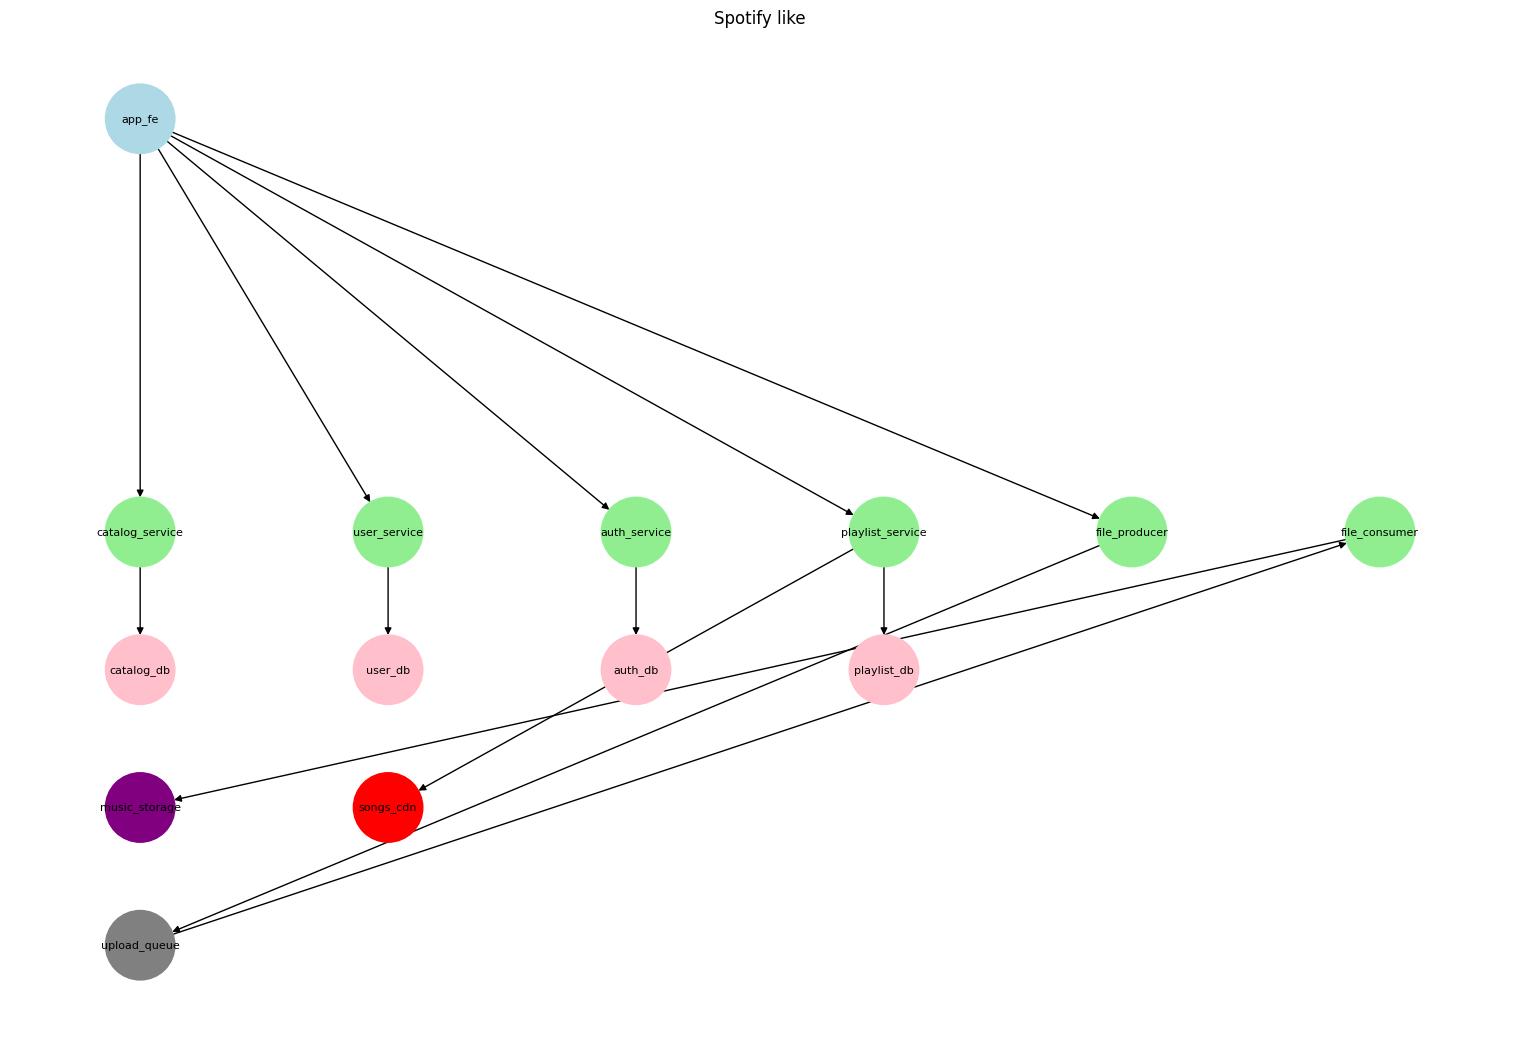


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 341 transacciones, 341 exitosas (100.00%)
Escenario 2 Completado: 979 transacciones, 979 exitosas (100.00%)
Escenario 3 Completado: 1328 transacciones, 1328 exitosas (100.00%)
Escenario 4 Completado: 1642 transacciones, 1641 exitosas (99.94%)
Escenario 5 Completado: 666 transacciones, 663 exitosas (99.55%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 341 - 1642
Tasa de éxito promedio: 99.90%
Desviación estándar de la tasa de éxito: 0.18%
Tasa de éxito mínima: 99.55%
Tasa de éxito máxima: 100.00%
Retraso de lanzamiento promedio: 4.04 ms


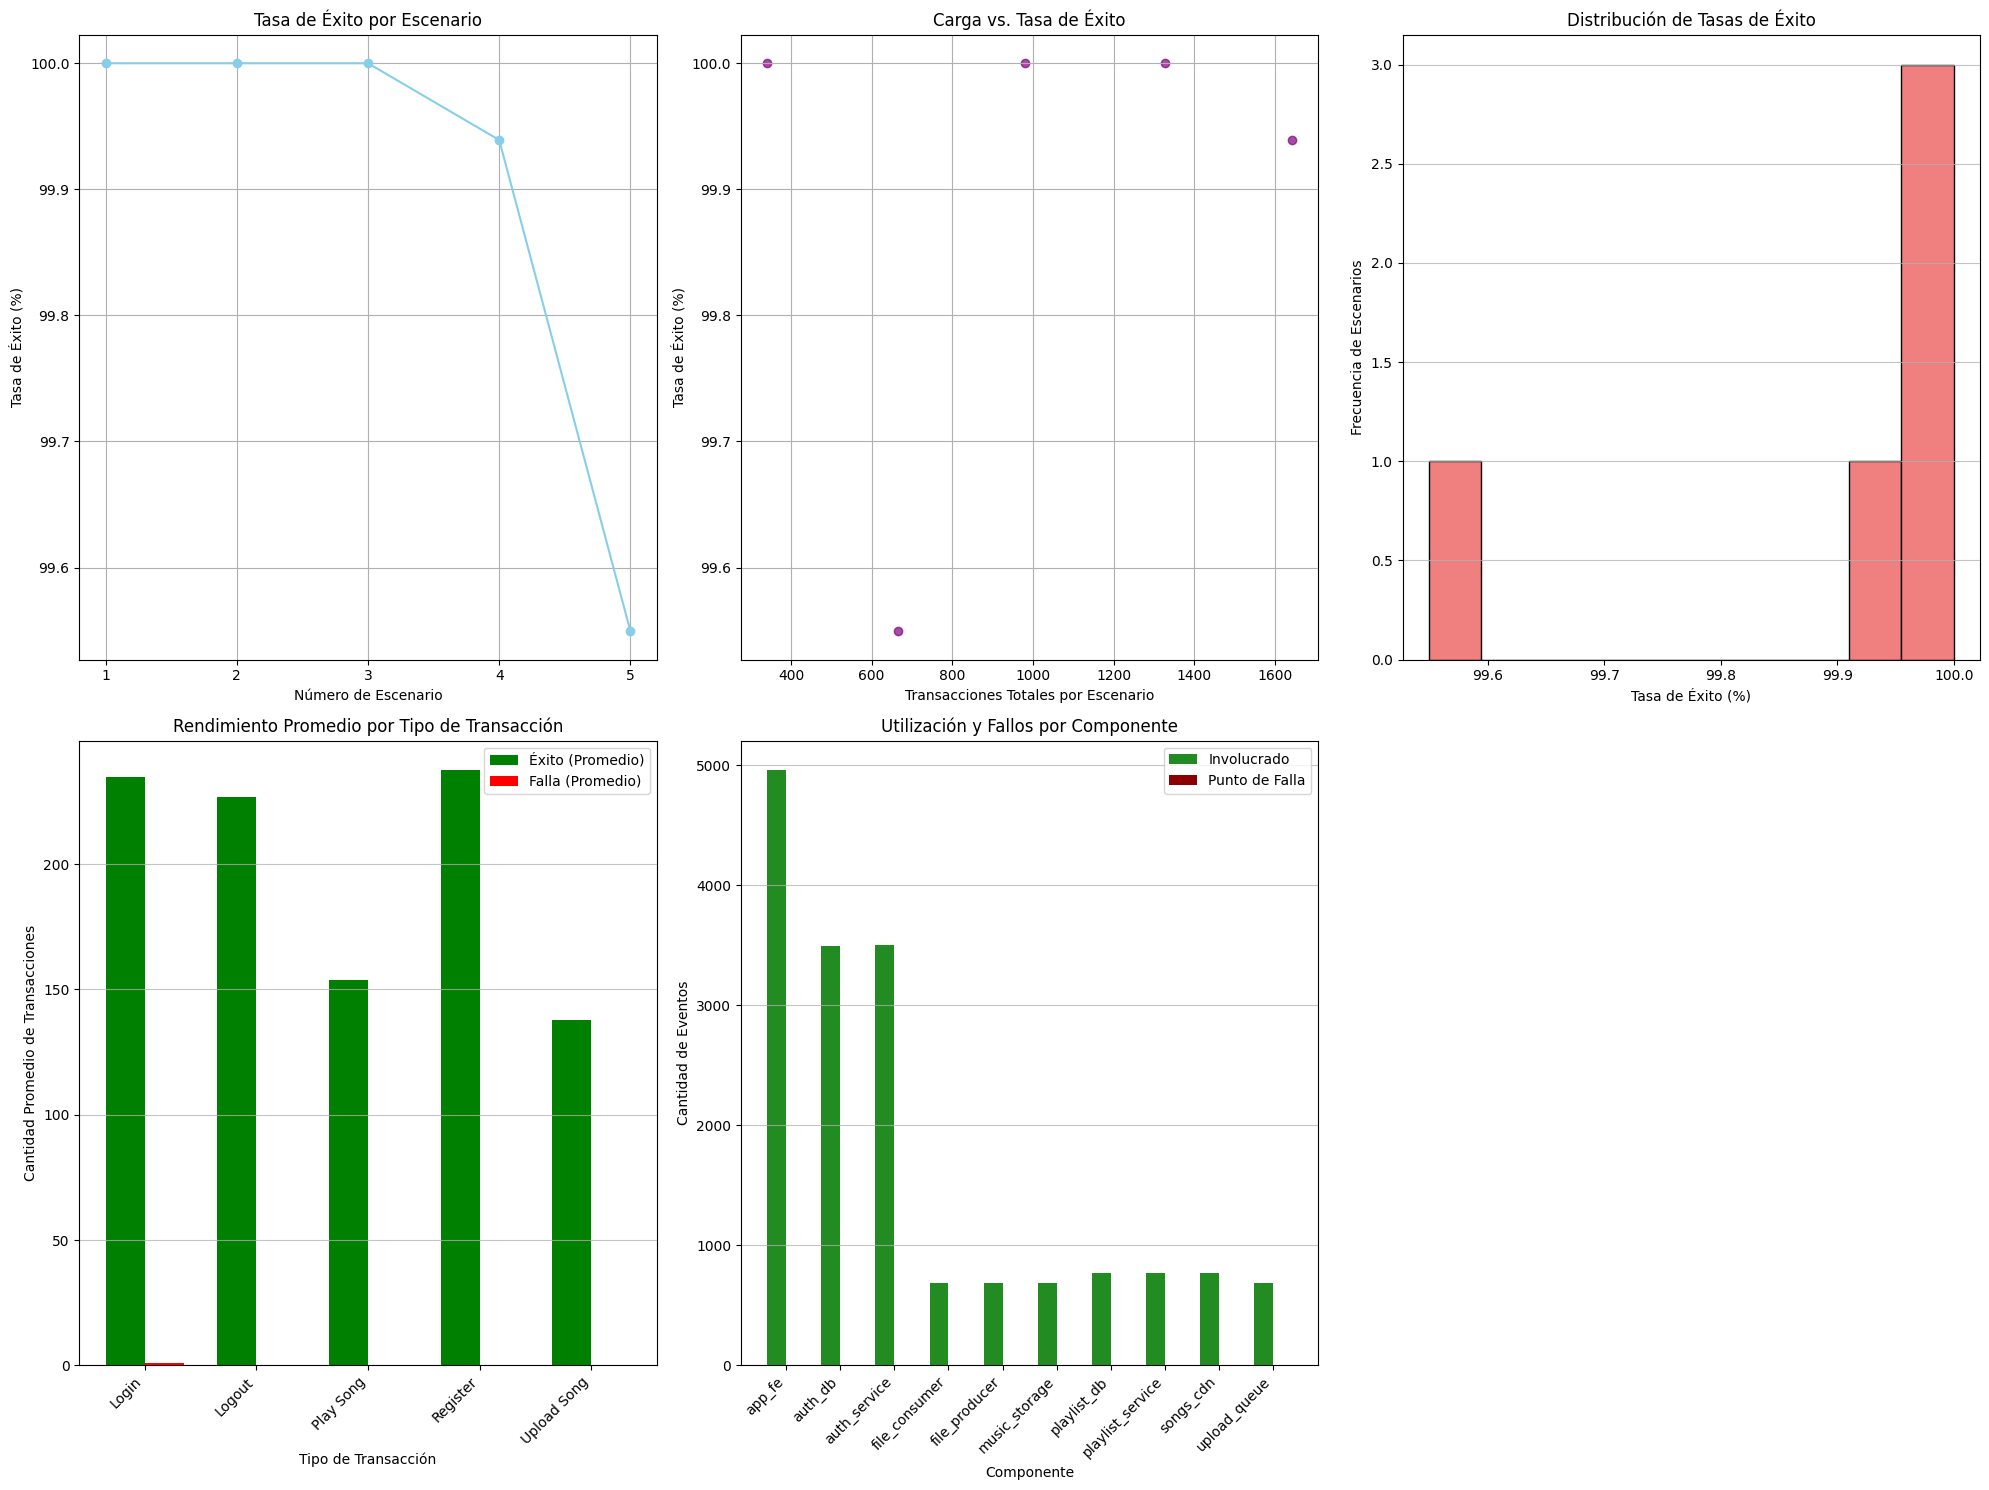

In [ ]:
components, graph = setup_architecture()

# Dibuja la arquitectura una vez al inicio
draw_architecture(graph)

# Ejecutar la simulación con múltiples escenarios
scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=200,
    max_tx_count=2000,
    thread_launch_delay_ms_min=1,  # Retraso de 0.1 a 5 ms entre transacciones
    thread_launch_delay_ms_max=5
)

# Analizar y visualizar los resultados de todos los escenarios
analyze_and_visualize_scenarios(scenario_results)

Se puede evidenciar un comportamiento relativamente normal donde ocurren alcunos fallos ocaciones en el servicio de autenticacion y su respectiva base de datos, esto es considerado algo normal dentro de los parametros asignados ya que todas las transacciones propuestas deben pasar por estos servicios

Ahora vamos a simular un ataque DDOS sobre nuestro sistema con la misma arquitectura

# Iteración 1
Para la iteracion de seguridad, primero, vamos a simular un ataque al componente de autorizacion puesto que este es el mas vulnerable, enviando una gran cantidad de peticiones para ver como se comporta:


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 6330 transacciones, 2264 exitosas (35.77%)
Escenario 2 Completado: 12162 transacciones, 2076 exitosas (17.07%)
Escenario 3 Completado: 13669 transacciones, 4769 exitosas (34.89%)
Escenario 4 Completado: 7252 transacciones, 2724 exitosas (37.56%)
Escenario 5 Completado: 7081 transacciones, 1500 exitosas (21.18%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 6330 - 13669
Tasa de éxito promedio: 29.29%
Desviación estándar de la tasa de éxito: 8.45%
Tasa de éxito mínima: 17.07%
Tasa de éxito máxima: 37.56%
Retraso de lanzamiento promedio: 0.59 ms


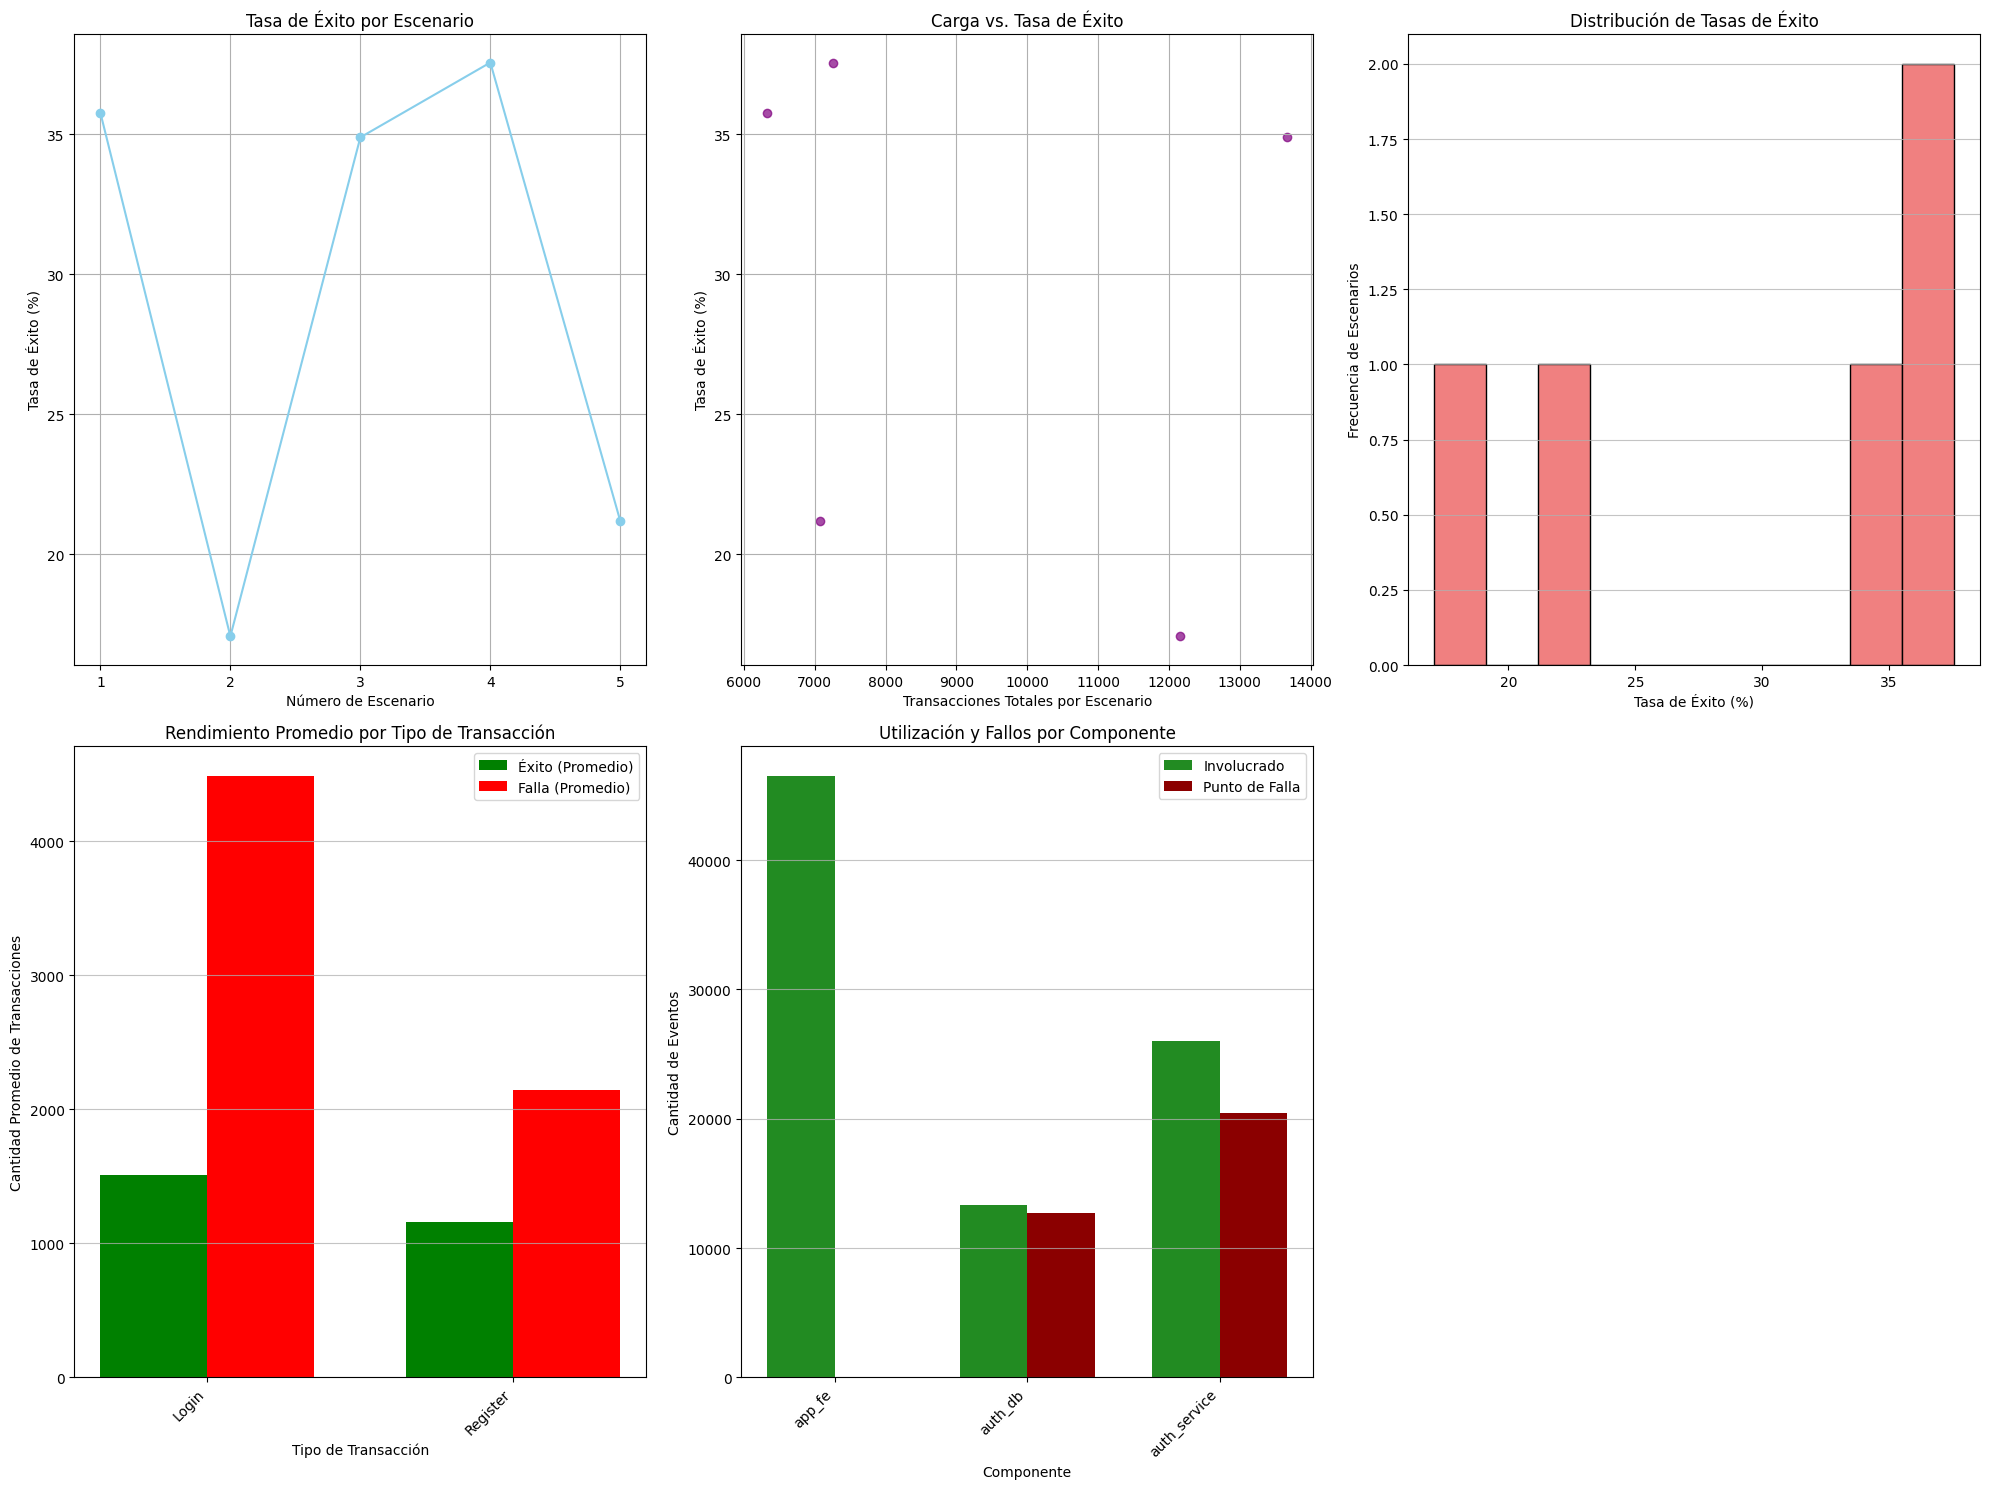

In [ ]:
auth_attack_scenario_results = run_multi_scenario_simulation(
        components,
        num_scenarios=5,
        min_tx_count=5000,   # Alto volumen de transacciones
        max_tx_count=15000, # Volumen considerable para estresar
        thread_launch_delay_ms_min=0,     # LLegada muy rápida
        thread_launch_delay_ms_max=1,     # Pequeño retraso para simular ráfaga densa
        scenario_transaction_types=['login', 'register'] # SOLO transacciones de login y register
)
analyze_and_visualize_scenarios(auth_attack_scenario_results)

Podemos evidenciar que el sistema es altamente vulnerable a este tipo de ataques ya que la capacidad maxima del sistema se llena muy rapidamente si se hacen demasiadas peticiones

Ademas vamos a simular un ataque al servicio de carga de archivos:


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 9408 transacciones, 7039 exitosas (74.82%)
Escenario 2 Completado: 10098 transacciones, 6451 exitosas (63.88%)
Escenario 3 Completado: 8093 transacciones, 5944 exitosas (73.45%)
Escenario 4 Completado: 10174 transacciones, 4819 exitosas (47.37%)
Escenario 5 Completado: 6420 transacciones, 4747 exitosas (73.94%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 6420 - 10174
Tasa de éxito promedio: 66.69%
Desviación estándar de la tasa de éxito: 10.45%
Tasa de éxito mínima: 47.37%
Tasa de éxito máxima: 74.82%
Retraso de lanzamiento promedio: 0.75 ms


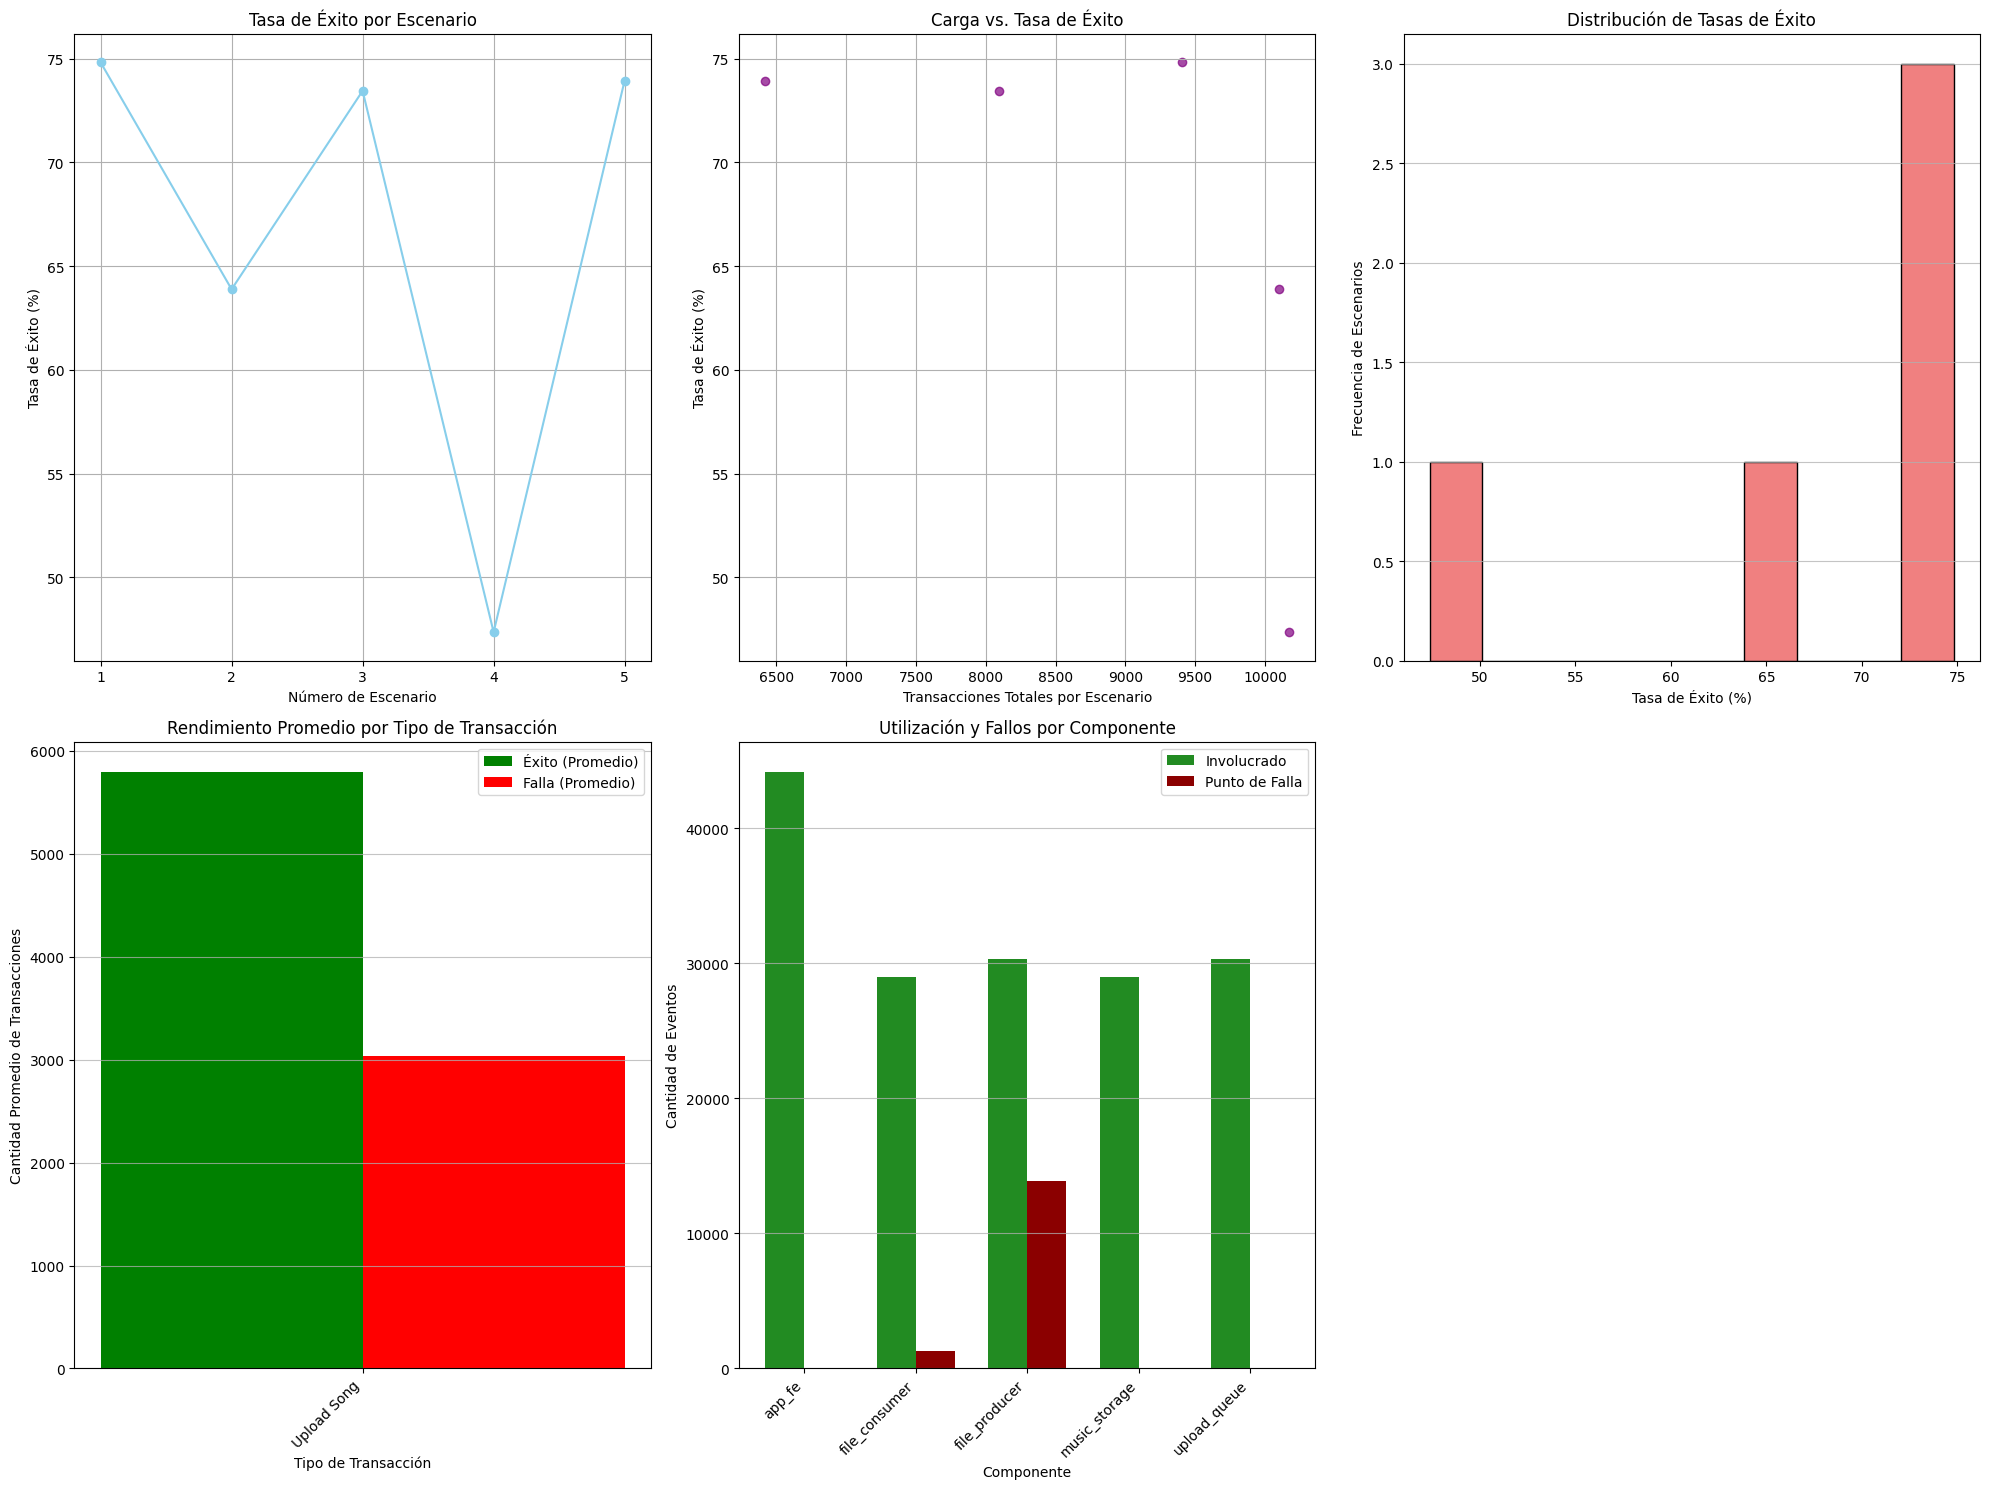

In [ ]:
upload_attack_scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=5000,    # Alto volumen de transacciones
    max_tx_count=15000, # Volumen considerable para estresar
    thread_launch_delay_ms_min=0,     # LLegada muy rápida
    thread_launch_delay_ms_max=1, # Pequeño retraso para simular ráfaga densa
    scenario_transaction_types=['upload_song'] # SOLO transacciones de upload
)
analyze_and_visualize_scenarios(upload_attack_scenario_results)

Generamos un DDOS general


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 12963 transacciones, 4830 exitosas (37.26%)
Escenario 2 Completado: 14741 transacciones, 9808 exitosas (66.54%)
Escenario 3 Completado: 7878 transacciones, 6024 exitosas (76.47%)
Escenario 4 Completado: 7143 transacciones, 5348 exitosas (74.87%)
Escenario 5 Completado: 10915 transacciones, 7669 exitosas (70.26%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 7143 - 14741
Tasa de éxito promedio: 65.08%
Desviación estándar de la tasa de éxito: 14.34%
Tasa de éxito mínima: 37.26%
Tasa de éxito máxima: 76.47%
Retraso de lanzamiento promedio: 0.57 ms


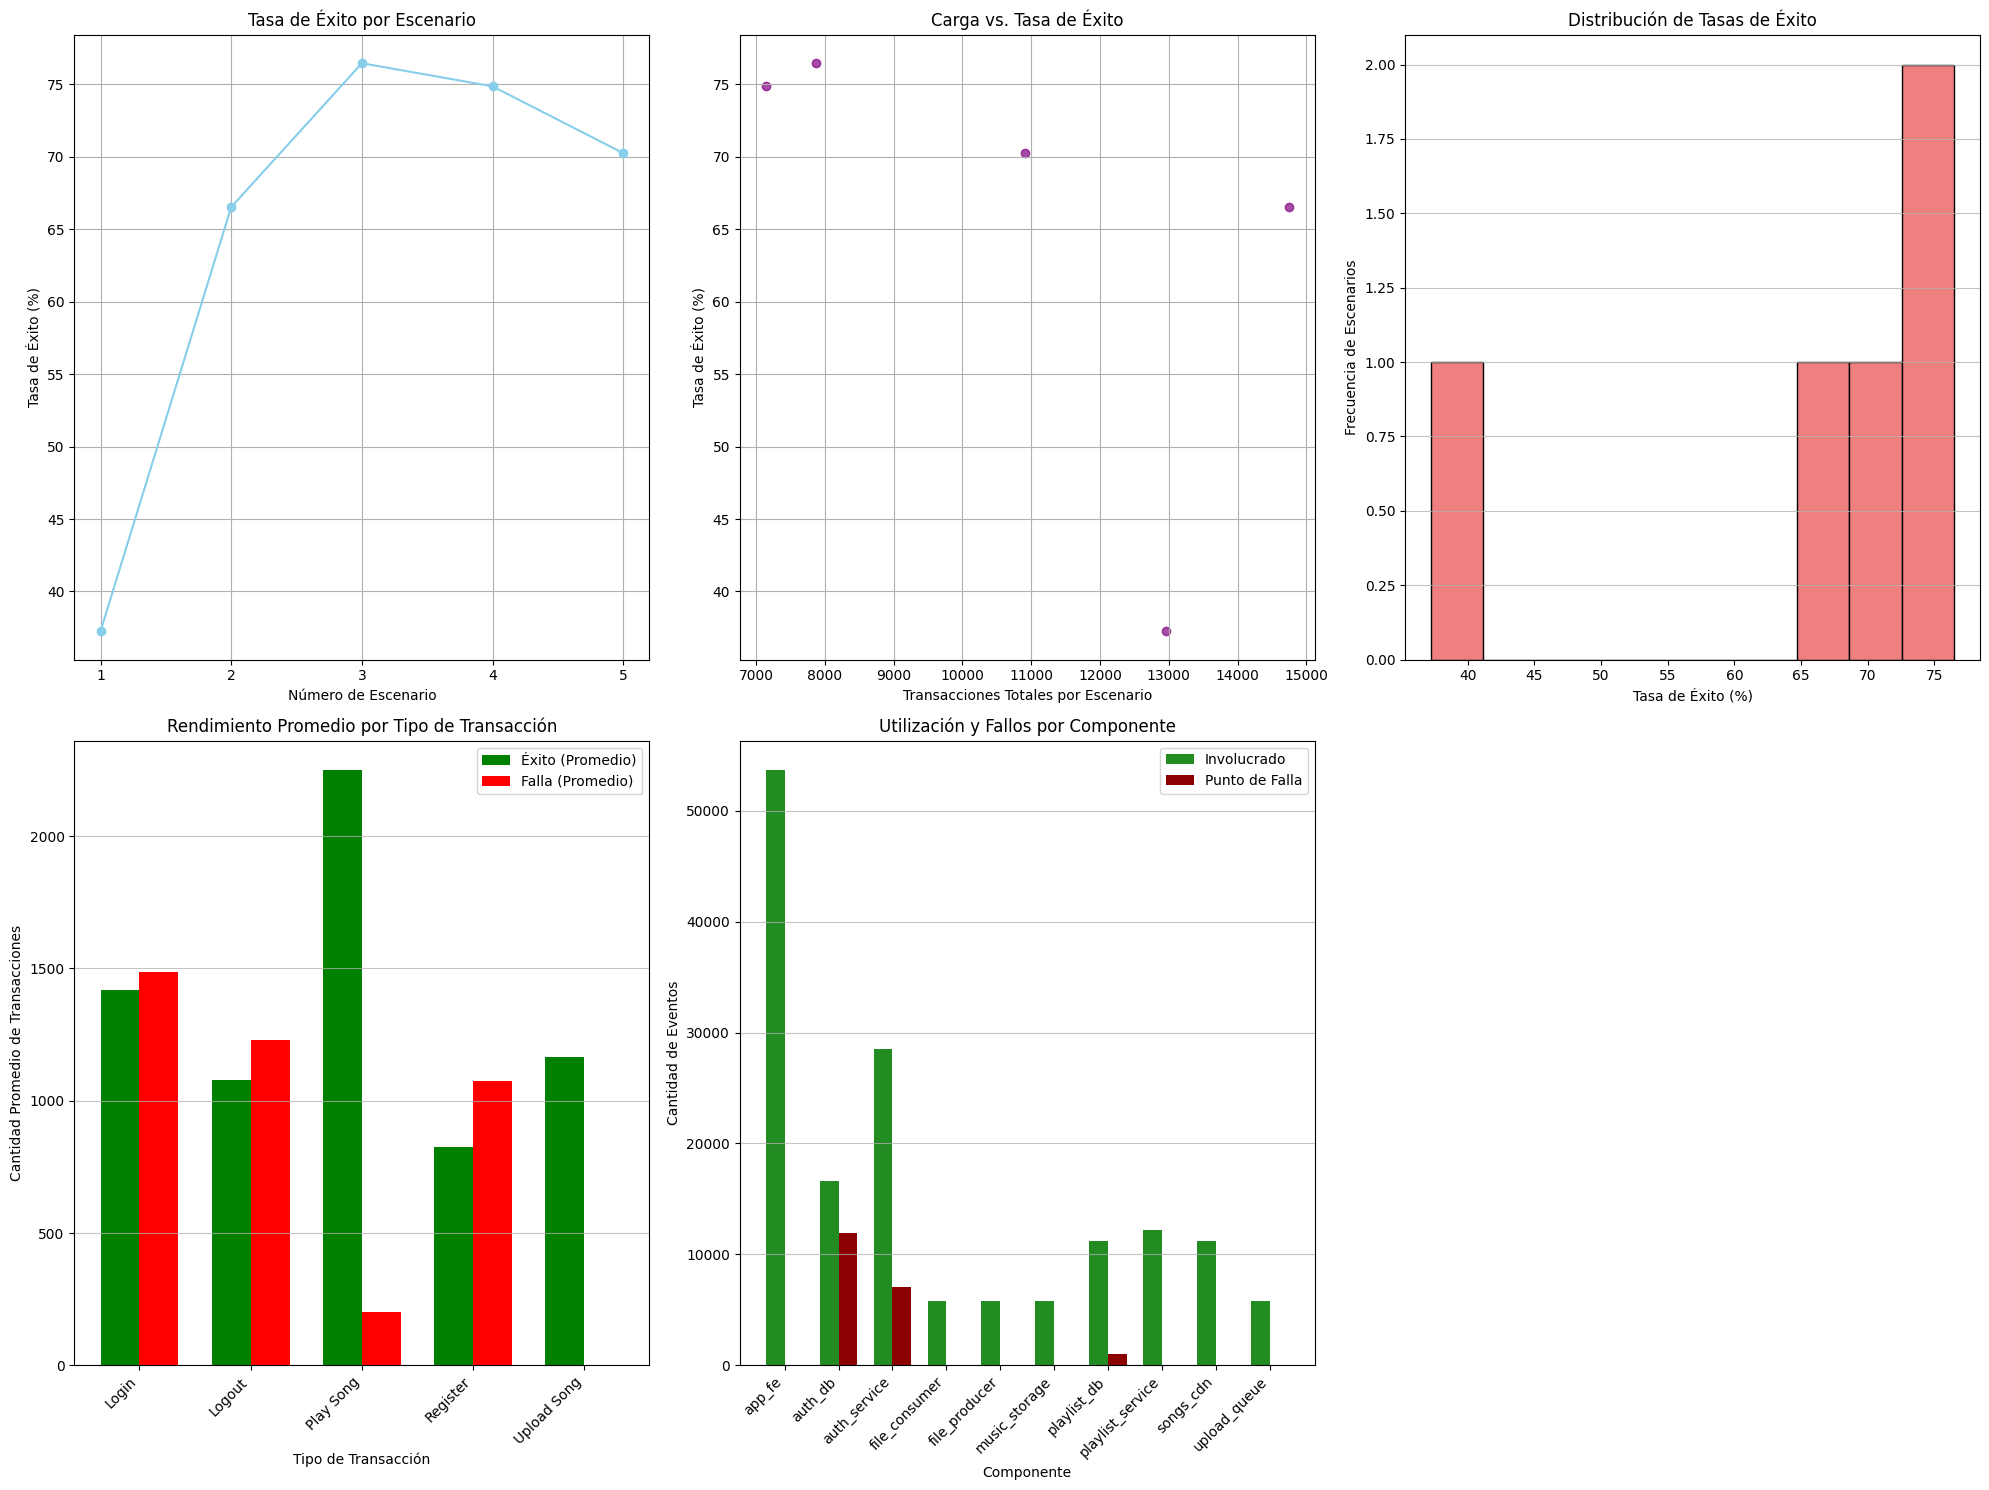

In [ ]:
general_attack_scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=5000,    # Alto volumen de transacciones
    max_tx_count=15000, # Volumen considerable para estresar
    thread_launch_delay_ms_min=0,     # LLegada muy rápida
    thread_launch_delay_ms_max=1, # Pequeño retraso para simular ráfaga densa
    # en este caso se usaran todas las rutas disponibles del sistema
)
analyze_and_visualize_scenarios(general_attack_scenario_results)

Como podemos ver en este momento, el sistema bastante vulnerable, los atacantes pueden crear ataques contra ciertos componentes del sistema y afectar el rendimiento de la aplicacion directamente

# Iteracion 2

Vamos a implementar un api gateway, para reducir la exposicion del sistema y ademas vamos a integrar tecnicas como rate limit y limit acces para mejorar el diseño del sistema:

Modificamos la clase del api gateway para añadir rate limiting

In [ ]:
import collections
class ApiGateway(Component):
    def __init__(self, name, capacity=250, rate_limit_per_second=300, min_processing_time=0.01,max_processing_time=0.03):
        super().__init__(name, "api_gateway", capacity, min_processing_time, max_processing_time)
        self.rate_limit_per_second = rate_limit_per_second
        self.request_timestamps = collections.deque()
        self.rate_limit_window = 1.0 # Ventana de tiempo en segundos

    def process_transaction(self, transaction):
        current_time = time.time()

        # Limpiar timestamps antiguos fuera de la ventana
        while self.request_timestamps and self.request_timestamps[0] < current_time - self.rate_limit_window:
            self.request_timestamps.popleft()

        # Verificar rate limit
        if len(self.request_timestamps) >= self.rate_limit_per_second:
            return 'RateLimited'

        self.request_timestamps.append(current_time)

        with self.lock:
            if self.current_load >= self.capacity:
                return False
            self.current_load += 1

        # Simular tiempo de procesamiento
        processing_time = random.uniform(self.min_processing_time, self.max_processing_time)
        time.sleep(processing_time)

        with self.lock:
            self.current_load -= 1
        return True # Procesamiento exitoso

Cambiamos la generacion de la arquitectura para añadir el elemento api gateway

In [ ]:
def setup_architecture():
    components = {}
    graph = nx.DiGraph()

    # Frontend
    components['app_fe'] = Frontend('app_fe')
    graph.add_node('app_fe', type='frontend')

    # API Gateway
    components['api_gateway_comp'] = ApiGateway('api_gateway_comp')
    graph.add_node('api_gateway_comp', type='api_gateway')
    graph.add_edge('app_fe', 'api_gateway_comp')

    # Backends y Load Balancers
    services = {
        'catalog': ('catalog_service', 'catalog_db', 'elasticsearch'),
        'user': ('user_service', 'user_db', 'postgresql'),
        'auth': ('auth_service',  'auth_db', 'postgresql'),
        'playlist': ('playlist_service','playlist_db', 'mongodb'),
        'file_producer': ('file_producer', None, None)
    }

    for service, (svc_name, db_name, db_type) in services.items():
        # Backend
        components[svc_name] = Backend(svc_name)
        graph.add_node(svc_name, type='backend')
        graph.add_edge('api_gateway_comp', svc_name)

        # Database
        if db_name:
            components[db_name] = Database(db_name, db_type)
            graph.add_node(db_name, type='database')
            graph.add_edge(svc_name, db_name)

    # Cola y consumidor
    components['upload_queue'] = Queue('upload_queue')
    graph.add_node('upload_queue', type='queue')

    components['file_consumer'] = Backend('file_consumer')
    graph.add_node('file_consumer', type='backend')

    components['music_storage'] = Bucket('music_storage')
    graph.add_node('music_storage', type='bucket')

    graph.add_edge('file_producer', 'upload_queue')
    graph.add_edge('upload_queue', 'file_consumer')
    graph.add_edge('file_consumer', 'music_storage')

    # CDN
    components['songs_cdn'] = CDN('songs_cdn')
    graph.add_node('songs_cdn', type='cdn')
    graph.add_edge('playlist_service', 'songs_cdn')

    return components, graph

Ademas cambiamos la definicion de las tareas para que todas tengan que pasar por el api gateway

In [ ]:
routes = {
        'api_gateway': [
             'api_gateway_comp'
        ],
        'play_song': [
            'app_fe', 'api_gateway_comp','playlist_service', 'playlist_db', 'songs_cdn'
        ],
        'upload_song': [
            'app_fe', 'api_gateway_comp', 'file_producer', 'upload_queue', 'file_consumer', 'music_storage'
        ],
        'login': [
            'app_fe', 'api_gateway_comp','auth_service', 'auth_db'
        ],
        'register': [
            'app_fe', 'api_gateway_comp','auth_service', 'auth_db'
        ],
        'logout': [
            'app_fe', 'api_gateway_comp','auth_service'
        ]
    }

Cambiamos la definicion de simular transacion para tener en cuenta las transaciones que fueron rechazadas.

In [ ]:
def simulate_transaction(transaction, components):
    success = True
    global routes

    route = routes.get(transaction.tx_type, [])

    for comp_name in route:
        component = components.get(comp_name)
        if not component:
             success = False
             transaction.failed_at_component = f"Componente no encontrado: {comp_name}"
             break
        process_result = component.process_transaction(transaction)

        if process_result == 'RateLimited':
            success = False
            transaction.status = 'Rejected'
            transaction.failed_at_component = comp_name
            break

        elif process_result is False:
            success = False
            transaction.status = 'Failed'
            transaction.failed_at_component = comp_name
            break

        else:
            transaction.components_involved.append(component.name)


    if success and transaction.status is None:
        transaction.status = 'Success'

    if transaction.status is None:
         transaction.status = 'Failed'
    return transaction

Definimos nuevamente la funcion de corre la simulacion, para llevar tracking de las petionces que fueron rechazadas

In [ ]:
def run_multi_scenario_simulation(components, num_scenarios=30,
                                  min_tx_count=500, max_tx_count=5000,
                                  thread_launch_delay_ms_min=1, thread_launch_delay_ms_max=10,
                                  scenario_transaction_types=None):
    all_scenario_results = []

    available_transaction_types = list(routes.keys())

    # Usar los tipos de transacción especificados, o todos si no se especifica ninguno
    if scenario_transaction_types is None:
        transaction_types_for_scenario = available_transaction_types
    else:
        # Filtrar para asegurar que los tipos solicitados existen en las rutas
        transaction_types_for_scenario = [t for t in scenario_transaction_types if t in available_transaction_types]
        if not transaction_types_for_scenario:
             print("Advertencia: Ninguno de los tipos de transacción solicitados es válido. Usando todos los tipos disponibles.")
             transaction_types_for_scenario = available_transaction_types

    # Asegurarse de que transaction_types_for_scenario no esté vacío antes de continuar
    if not transaction_types_for_scenario:
        print("Error: No hay tipos de transacción válidos para simular.")
        return []


    print(f"\n=== Iniciando Simulación de {num_scenarios} Escenarios ===")
    for i in range(num_scenarios):
        # Generar una cantidad aleatoria de transacciones para cada escenario
        tx_count_scenario = np.random.randint(min_tx_count, max_tx_count + 1)

        # Generar un retraso aleatorio para el lanzamiento de hilos para este escenario
        thread_launch_delay = np.random.uniform(thread_launch_delay_ms_min, thread_launch_delay_ms_max) / 1000.0

        # Generar una distribución aleatoria de pesos SÓLO para los tipos seleccionados
        # Asegurarse de que los pesos se generen para la longitud correcta de la lista
        weights = np.random.rand(len(transaction_types_for_scenario))
        weights = weights / weights.sum() # Normalizar pesos

        scenario_metrics = [] # Esta lista ahora contendrá los objetos Transaction
        threads = []

        # Lock para asegurar que añadir a scenario_metrics sea seguro en hilos
        metrics_lock = threading.Lock()

        # Función auxiliar para que el hilo ejecute la simulación y añada el resultado
        def thread_simulate_and_add(tx, components, metrics_list, lock):
            # simulate_transaction ahora retorna la tx completada
            completed_tx = simulate_transaction(tx, components)
            with lock:
                metrics_list.append(completed_tx)


        # Generar y lanzar las transacciones SÓLO de los tipos seleccionados
        for j in range(tx_count_scenario):
            # Seleccionar un tipo de transacción de la lista filtrada
            chosen_tx_type = np.random.choice(transaction_types_for_scenario, p=weights)

            # Crear la instancia de Transaction
            if chosen_tx_type == 'api_gateway':
                tx = Transaction('api_gateway', f'user_{j}')
            elif chosen_tx_type == 'play_song':
                tx = Transaction('play_song', f'user_{j}', f'song_{np.random.randint(1,1000)}')
            elif chosen_tx_type == 'upload_song':
                tx = Transaction('upload_song', f'producer_{j}', f'new_song_{np.random.randint(1,1000)}')
            elif chosen_tx_type == 'login':
                 tx = Transaction('login', f'user_{j}')
            elif chosen_tx_type == 'register':
                 tx = Transaction('register', f'user_{j}')
            elif chosen_tx_type == 'logout':
                 tx = Transaction('logout', f'user_{j}')
            else:
                 print(f"Advertencia: Tipo de transacción desconocido generado: {chosen_tx_type}")
                 continue


            # Lanzar el hilo de simulación de transacción
            thread = threading.Thread(target=thread_simulate_and_add, args=(tx, components, scenario_metrics, metrics_lock))
            threads.append(thread)
            thread.start()

            # Introduce el retraso entre lanzamientos de hilos, si es mayor que cero
            if thread_launch_delay > 0:
                time.sleep(thread_launch_delay)

        # Esperar a que todos los hilos de este escenario terminen
        for thread in threads:
            thread.join()

        # --- Recopilar resultados resumidos y la lista completa de transacciones ---
        total_tx = len(scenario_metrics)
        success_tx = sum(1 for tx in scenario_metrics if tx.status == 'Success')
        failed_tx = sum(1 for tx in scenario_metrics if tx.status == 'Failed') # Contar fallidos
        rejected_tx = sum(1 for tx in scenario_metrics if tx.status == 'Rejected') # Contar rechazados
        success_rate = (success_tx / total_tx) * 100 if total_tx > 0 else 0

        type_stats_scenario = defaultdict(lambda: {'success': 0, 'failed': 0, 'rejected': 0}) # Añadir 'rejected'
        for tx in scenario_metrics:
            if tx.status == 'Success':
                type_stats_scenario[tx.tx_type]['success'] += 1
            elif tx.status == 'Failed':
                type_stats_scenario[tx.tx_type]['failed'] += 1
            elif tx.status == 'Rejected':
                type_stats_scenario[tx.tx_type]['rejected'] += 1


        all_scenario_results.append({
            'scenario_id': i + 1,
            'total_transactions': total_tx,
            'successful_transactions': success_tx,
            'failed_transactions': failed_tx,
            'rejected_transactions': rejected_tx, # Añadir rechazados al resumen
            'success_rate': success_rate,
            'avg_launch_delay_ms': thread_launch_delay * 1000,
            'type_breakdown': dict(type_stats_scenario),
            'transactions': scenario_metrics
        })

        print(f"Escenario {i+1} Completado: {total_tx} totales, {success_tx} exitosas, {failed_tx} fallidas, {rejected_tx} rechazadas ({success_rate:.2f}%)")

    return all_scenario_results

Definimos nuevamente la funcion que nos mostrara los resultados, para que tambien muestre la cantidad de peticiones rechazadas.

In [ ]:
def analyze_and_visualize_scenarios(all_scenario_results):
    if not all_scenario_results:
        print("No hay resultados de escenarios para analizar.")
        return

    # Convertir resultados resumidos a arrays de NumPy para análisis fácil
    scenario_ids = np.array([res['scenario_id'] for res in all_scenario_results])
    total_transactions = np.array([res['total_transactions'] for res in all_scenario_results])
    successful_transactions = np.array([res['successful_transactions'] for res in all_scenario_results])
    failed_transactions = np.array([res['failed_transactions'] for res in all_scenario_results])
    rejected_transactions = np.array([res['rejected_transactions'] for res in all_scenario_results]) # Obtener rechazados
    success_rates = np.array([res['success_rate'] for res in all_scenario_results])
    avg_launch_delays = np.array([res['avg_launch_delay_ms'] for res in all_scenario_results])


    print("\n=== Análisis Consolidado de Escenarios ===")
    print(f"Número total de escenarios simulados: {len(all_scenario_results)}")
    print(f"Rango de transacciones por escenario: {total_transactions.min()} - {total_transactions.max()}")
    # Reportar también el promedio de fallidas y rechazadas
    print(f"Promedio de transacciones exitosas por escenario: {np.mean(successful_transactions):.2f}")
    print(f"Promedio de transacciones fallidas por escenario: {np.mean(failed_transactions):.2f}")
    print(f"Promedio de transacciones rechazadas por escenario: {np.mean(rejected_transactions):.2f}")
    print(f"Tasa de éxito promedio: {np.mean(success_rates):.2f}%")
    print(f"Desviación estándar de la tasa de éxito: {np.std(success_rates):.2f}%")
    print(f"Tasa de éxito mínima: {success_rates.min():.2f}%")
    print(f"Tasa de éxito máxima: {success_rates.max():.2f}%")
    print(f"Retraso de lanzamiento promedio: {np.mean(avg_launch_delays):.2f} ms")

    component_involved_counts = defaultdict(int) # Total de veces que un componente fue parte de una ruta (exitosa o no)
    component_failure_counts = defaultdict(int) # Total de veces que un componente fue el punto de fallo (capacidad)
    component_rejected_counts = defaultdict(int) # Total de veces que un componente fue el punto de rechazo (rate limit)
    all_component_names_set = set()

    for scenario_result in all_scenario_results:
        # Acceder a la lista completa de transacciones para este escenario
        scenario_transactions = scenario_result.get('transactions', [])

        for tx in scenario_transactions:
            # Contar involucramiento para todos los componentes en la ruta (hasta el fallo/rechazo si ocurrió)
            for comp_name in tx.components_involved:
                 component_involved_counts[comp_name] += 1
                 all_component_names_set.add(comp_name) # Añadir a la lista global de nombres

            # Contar el fallo o rechazo si ocurrió en un componente específico
            if tx.status == 'Failed' and tx.failed_at_component:
                component_failure_counts[tx.failed_at_component] += 1
                all_component_names_set.add(tx.failed_at_component) # Asegurar que el componente fallido esté en la lista
            elif tx.status == 'Rejected' and tx.failed_at_component:
                 component_rejected_counts[tx.failed_at_component] += 1
                 all_component_names_set.add(tx.failed_at_component) # Asegurar que el componente rechazado esté en la lista


    # Ordenar los nombres de los componentes para la gráfica
    component_names = sorted(list(all_component_names_set))

    # Preparar los datos para la gráfica de componentes
    comp_involved_values = [component_involved_counts.get(name, 0) for name in component_names]
    comp_failure_values = [component_failure_counts.get(name, 0) for name in component_names]
    comp_rejected_values = [component_rejected_counts.get(name, 0) for name in component_names]


    plt.figure(figsize=(20, 15))

    # Gráfico 1: Tasa de Éxito por Escenario (2 filas, 3 columnas, posición 1)
    plt.subplot(2, 3, 1)
    plt.plot(scenario_ids, success_rates, marker='o', linestyle='-', color='skyblue')
    plt.title('Tasa de Éxito por Escenario')
    plt.xlabel('Número de Escenario')
    plt.ylabel('Tasa de Éxito (%)')
    plt.grid(True)
    tick_interval = max(1, len(scenario_ids) // 5)
    plt.xticks(scenario_ids[::tick_interval])


    # Gráfico 2: Relación entre Carga (Transacciones Totales) y Tasa de Éxito (2 filas, 3 columnas, posición 2)
    plt.subplot(2, 3, 2)
    plt.scatter(total_transactions, success_rates, color='purple', alpha=0.7)
    plt.title('Carga vs. Tasa de Éxito')
    plt.xlabel('Transacciones Totales por Escenario')
    plt.ylabel('Tasa de Éxito (%)')
    plt.grid(True)

    # Gráfico 3: Histograma de Tasas de Éxito (2 filas, 3 columnas, posición 3)
    plt.subplot(2, 3, 3)
    plt.hist(success_rates, bins=10, color='lightcoral', edgecolor='black')
    plt.title('Distribución de Tasas de Éxito')
    plt.xlabel('Tasa de Éxito (%)')
    plt.ylabel('Frecuencia de Escenarios')
    plt.grid(axis='y', alpha=0.75)

    # Gráfico 4: Rendimiento Promedio por Tipo de Transacción (2 filas, 3 columnas, posición 4)
    # Recalcular transaction_types a partir de todos los resultados para asegurar que estén todos los tipos
    all_transaction_types_in_results = set()
    for res in all_scenario_results:
        all_transaction_types_in_results.update(res['type_breakdown'].keys())
    transaction_types = sorted(list(all_transaction_types_in_results))


    avg_success_by_type = defaultdict(float)
    avg_failed_by_type = defaultdict(float)
    avg_rejected_by_type = defaultdict(float) # Añadir promedio de rechazados por tipo

    for res in all_scenario_results:
        for tx_type, stats in res['type_breakdown'].items():
            avg_success_by_type[tx_type] += stats['success']
            avg_failed_by_type[tx_type] += stats['failed']
            avg_rejected_by_type[tx_type] += stats['rejected'] # Sumar rechazados por tipo

    num_scenarios_actual = len(all_scenario_results)
    for tx_type in transaction_types:
        avg_success_by_type[tx_type] /= num_scenarios_actual
        avg_failed_by_type[tx_type] /= num_scenarios_actual
        avg_rejected_by_type[tx_type] /= num_scenarios_actual # Calcular promedio de rechazados

    success_values = [avg_success_by_type.get(t, 0) for t in transaction_types]
    failed_values = [avg_failed_by_type.get(t, 0) for t in transaction_types]
    rejected_values = [avg_rejected_by_type.get(t, 0) for t in transaction_types] # Valores de rechazados

    x = np.arange(len(transaction_types))
    width = 0.25 # Ajustar ancho de barras para 3 barras

    plt.subplot(2, 3, 4) # Posición 4
    plt.bar(x - width, success_values, width, label='Éxito (Promedio)', color='green')
    plt.bar(x, failed_values, width, label='Falla (Promedio)', color='red')
    plt.bar(x + width, rejected_values, width, label='Rechazado (Promedio)', color='orange') # Barra para rechazados
    plt.xticks(x, [t.replace('_', ' ').title() for t in transaction_types], rotation=45, ha='right')
    plt.title('Rendimiento Promedio por Tipo de Transacción')
    plt.xlabel('Tipo de Transacción')
    plt.ylabel('Cantidad Promedio de Transacciones')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)


    # Gráfico 5: Utilización, Fallos y Rechazos por Componente
    x_comp = np.arange(len(component_names))
    plt.subplot(2, 3, 5) # Posición 5
    plt.bar(x_comp - width, comp_involved_values, width, label='Involucrado', color='forestgreen')
    plt.bar(x_comp, comp_failure_values, width, label='Punto de Falla (Capacidad)', color='darkred')
    plt.bar(x_comp + width, comp_rejected_values, width, label='Punto de Rechazo (Rate Limit)', color='darkorange') # Barra para rechazos por componente

    plt.xticks(x_comp, component_names, rotation=45, ha='right')
    plt.title('Utilización, Fallos y Rechazos por Componente')
    plt.xlabel('Componente')
    plt.ylabel('Cantidad de Eventos')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)


    plt.tight_layout()
    plt.show()

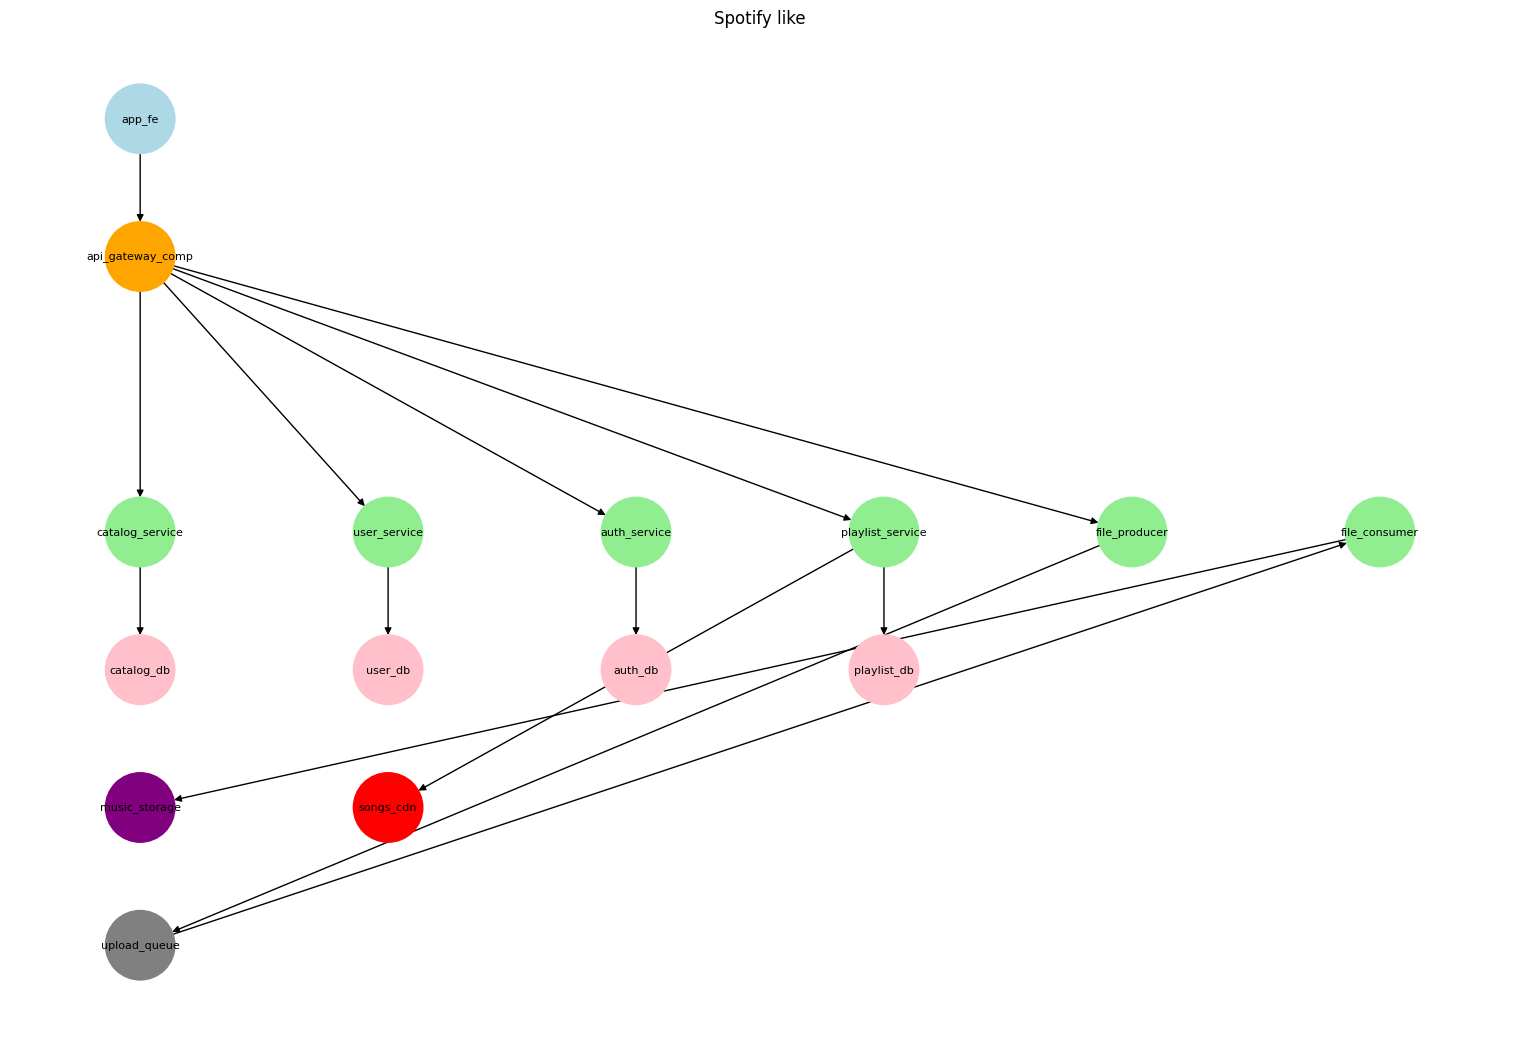


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 1572 totales, 1572 exitosas, 0 fallidas, 0 rechazadas (100.00%)
Escenario 2 Completado: 1480 totales, 900 exitosas, 0 fallidas, 580 rechazadas (60.81%)
Escenario 3 Completado: 1961 totales, 1961 exitosas, 0 fallidas, 0 rechazadas (100.00%)
Escenario 4 Completado: 1686 totales, 1686 exitosas, 0 fallidas, 0 rechazadas (100.00%)
Escenario 5 Completado: 1402 totales, 1402 exitosas, 0 fallidas, 0 rechazadas (100.00%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 1402 - 1961
Promedio de transacciones exitosas por escenario: 1504.20
Promedio de transacciones fallidas por escenario: 0.00
Promedio de transacciones rechazadas por escenario: 116.00
Tasa de éxito promedio: 92.16%
Desviación estándar de la tasa de éxito: 15.68%
Tasa de éxito mínima: 60.81%
Tasa de éxito máxima: 100.00%
Retraso de lanzamiento promedio: 3.47 ms


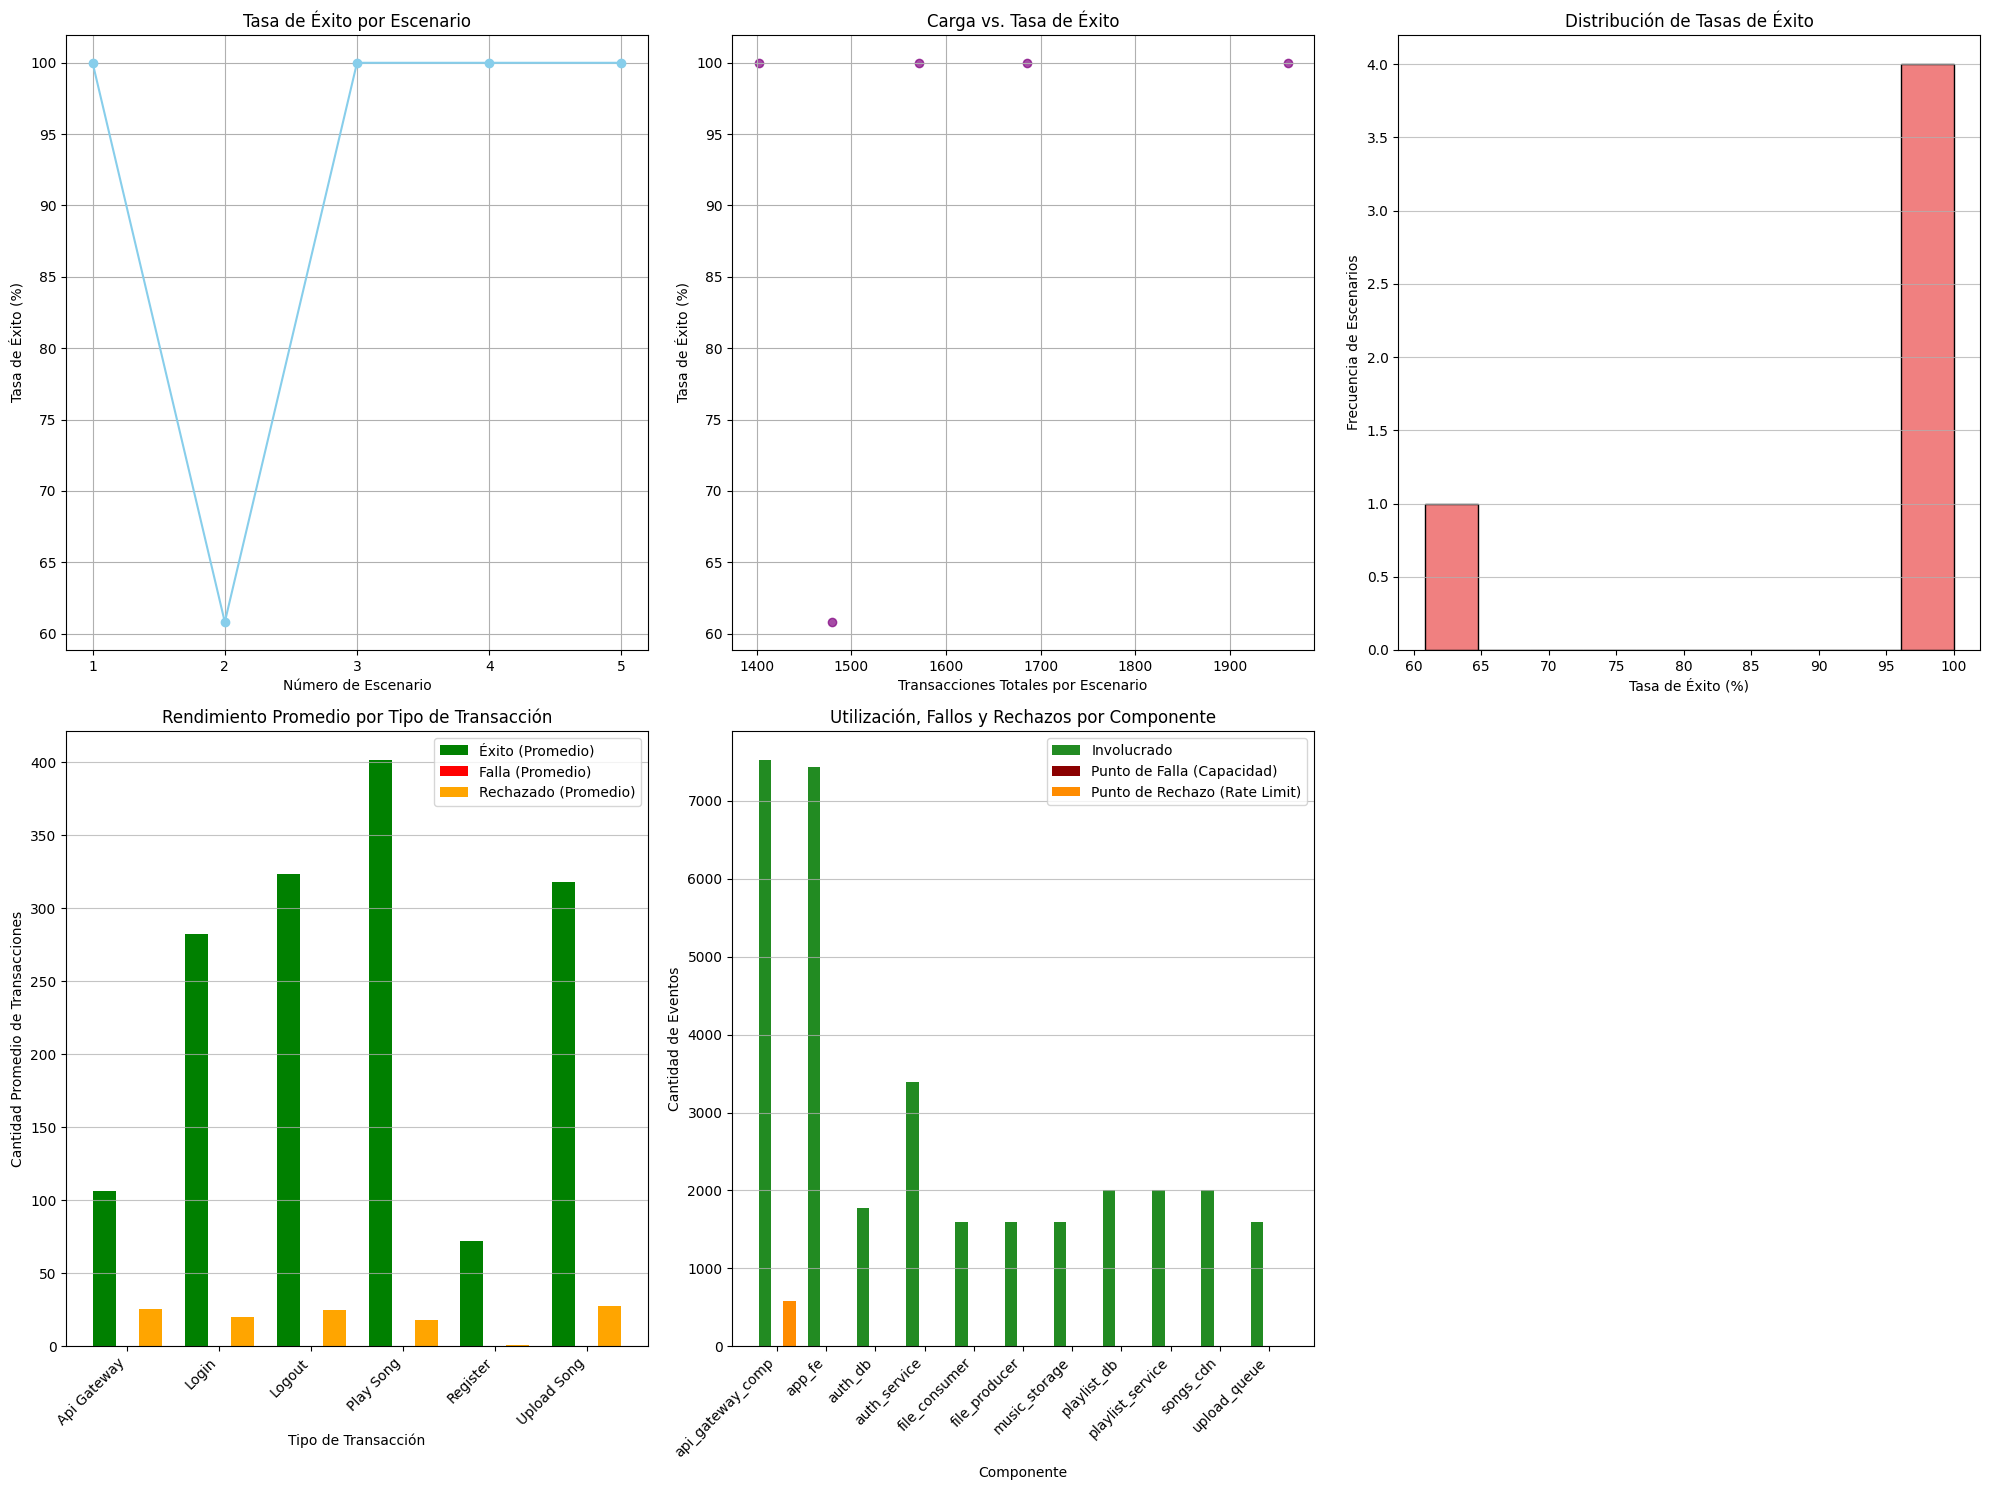

In [ ]:
components, graph = setup_architecture()

# Dibujamos nuevamente la arquitectura pero ahora tenemos el api gateway
draw_architecture(graph)
scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=200,
    max_tx_count=2000,
    thread_launch_delay_ms_min=1,  # Retraso de 1 a 5 ms entre transacciones
    thread_launch_delay_ms_max=5
)

# Analizar y visualizar los resultados de todos los escenarios
analyze_and_visualize_scenarios(scenario_results)

Ahora simulamos nuevamente el ataque al auth service


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 6867 totales, 317 exitosas, 883 fallidas, 5667 rechazadas (4.62%)
Escenario 2 Completado: 10122 totales, 1632 exitosas, 1783 fallidas, 6707 rechazadas (16.12%)
Escenario 3 Completado: 7646 totales, 1423 exitosas, 1436 fallidas, 4787 rechazadas (18.61%)
Escenario 4 Completado: 9571 totales, 743 exitosas, 798 fallidas, 8030 rechazadas (7.76%)
Escenario 5 Completado: 7422 totales, 1293 exitosas, 1456 fallidas, 4673 rechazadas (17.42%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 6867 - 10122
Promedio de transacciones exitosas por escenario: 1081.60
Promedio de transacciones fallidas por escenario: 1271.20
Promedio de transacciones rechazadas por escenario: 5972.80
Tasa de éxito promedio: 12.91%
Desviación estándar de la tasa de éxito: 5.63%
Tasa de éxito mínima: 4.62%
Tasa de éxito máxima: 18.61%
Retraso de lanzamiento promedio: 0.49 ms


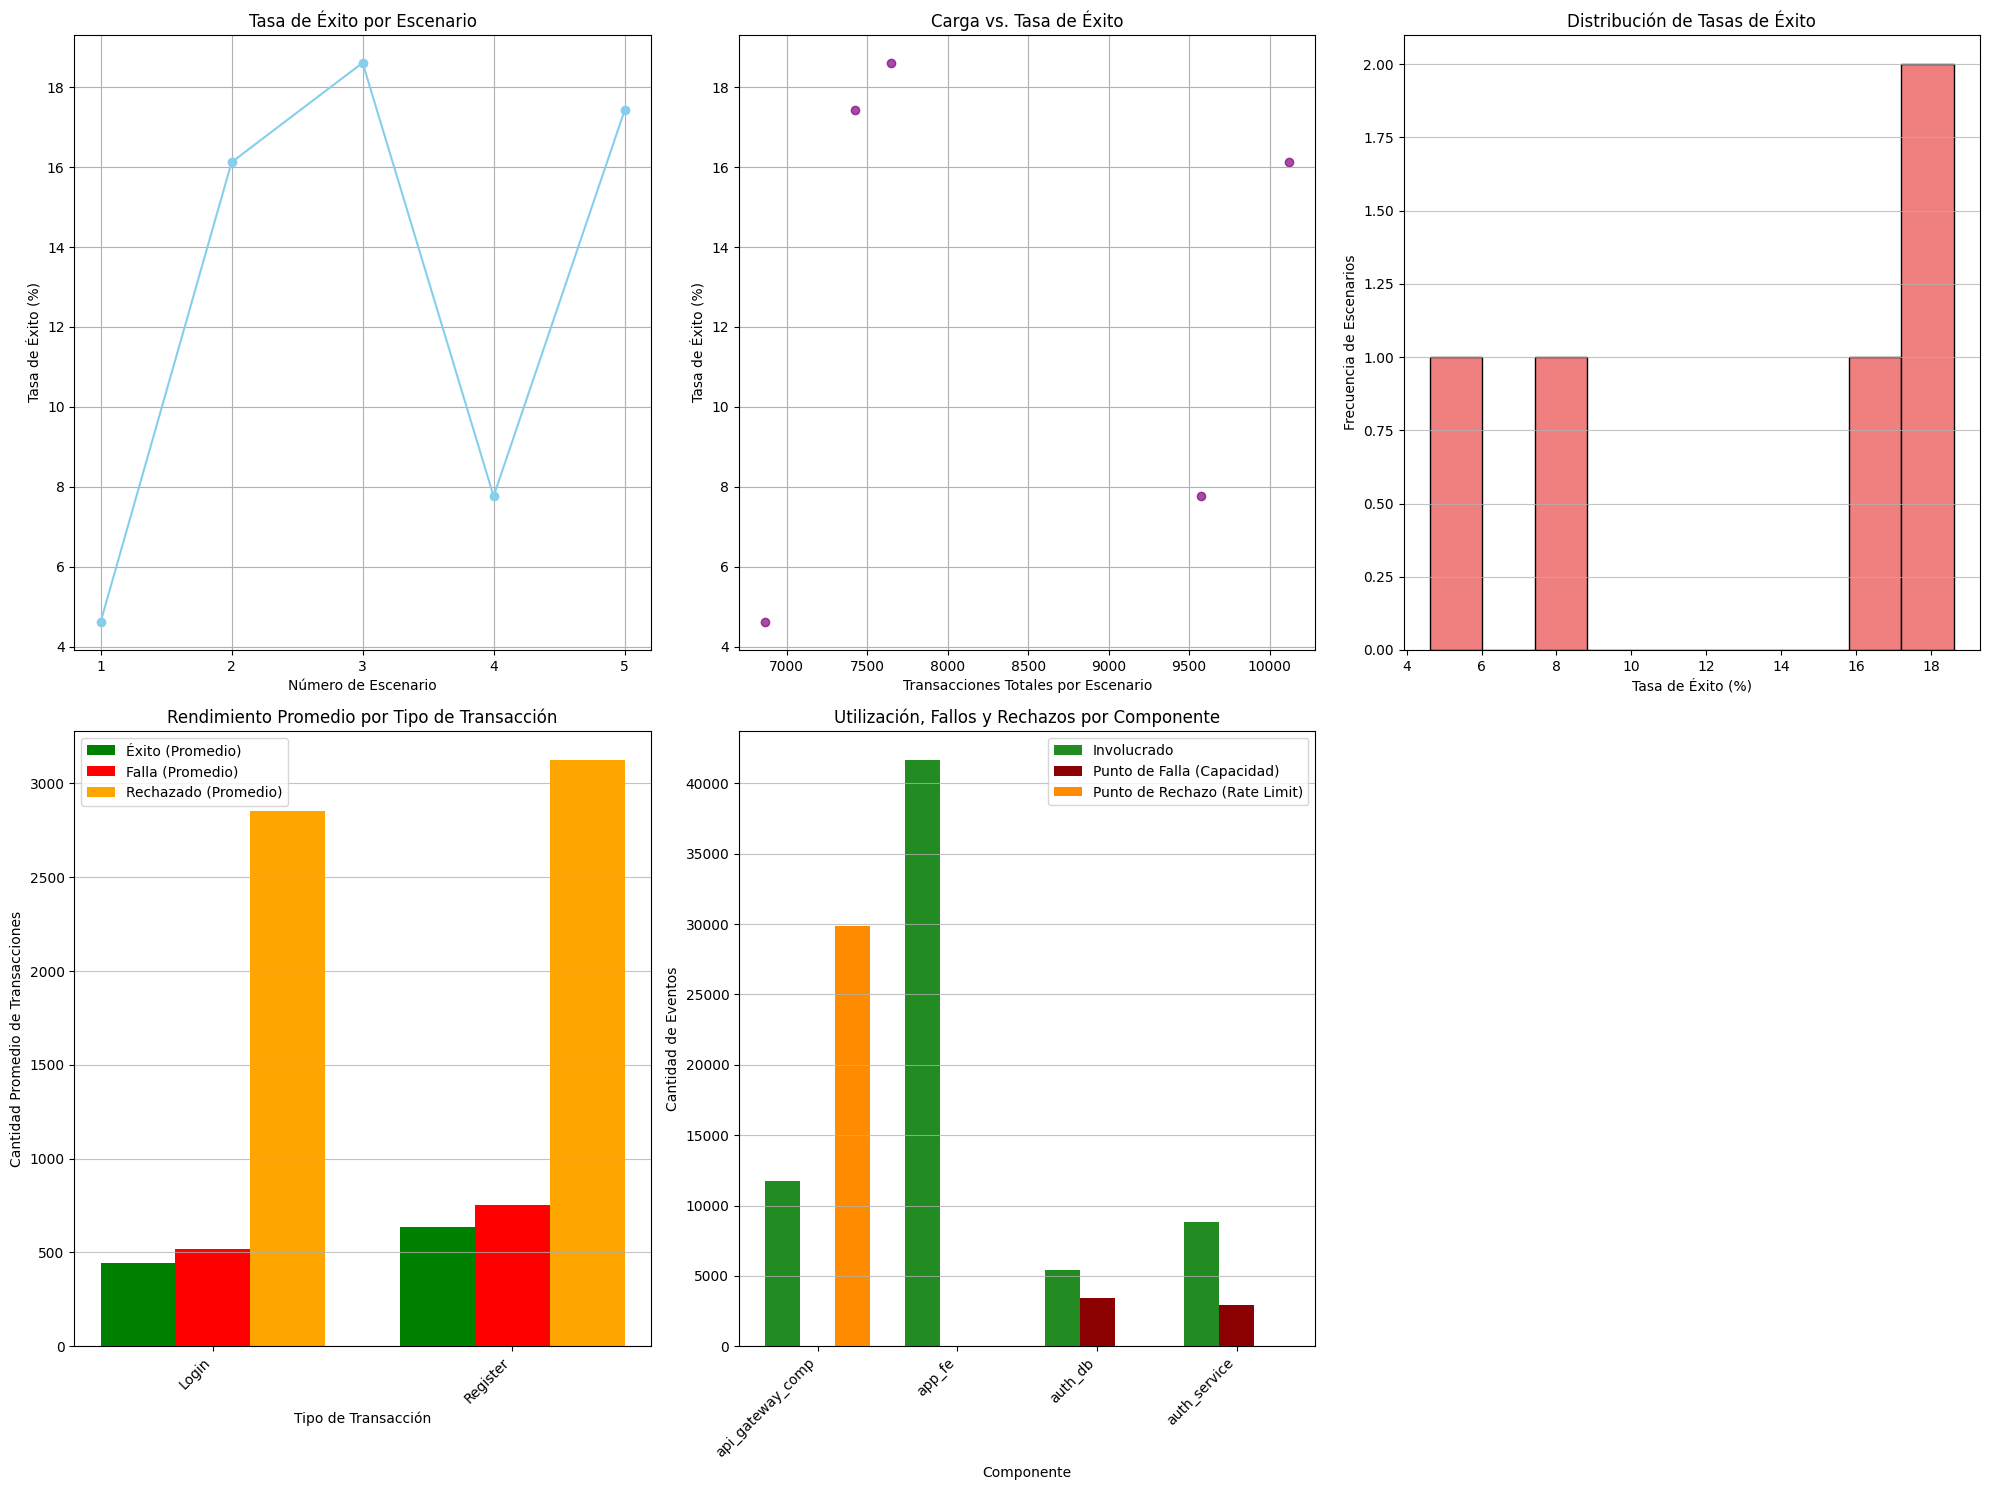

In [ ]:
auth_attack_scenario_results = run_multi_scenario_simulation(
        components,
        num_scenarios=5,
        min_tx_count=5000,   # Alto volumen de transacciones
        max_tx_count=15000, # Volumen considerable para estresar
        thread_launch_delay_ms_min=0,     # LLegada muy rápida
        thread_launch_delay_ms_max=1, # Pequeño retraso para simular ráfaga densa
        scenario_transaction_types=['login', 'register'] # SOLO transacciones de login y register
)
analyze_and_visualize_scenarios(auth_attack_scenario_results)

Simulamos nuevamente el ataque al upload service.


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 9357 totales, 2070 exitosas, 866 fallidas, 6421 rechazadas (22.12%)
Escenario 2 Completado: 11570 totales, 4002 exitosas, 977 fallidas, 6591 rechazadas (34.59%)
Escenario 3 Completado: 6436 totales, 1771 exitosas, 629 fallidas, 4036 rechazadas (27.52%)
Escenario 4 Completado: 10185 totales, 2742 exitosas, 801 fallidas, 6642 rechazadas (26.92%)
Escenario 5 Completado: 12746 totales, 775 exitosas, 1025 fallidas, 10946 rechazadas (6.08%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 6436 - 12746
Promedio de transacciones exitosas por escenario: 2272.00
Promedio de transacciones fallidas por escenario: 859.60
Promedio de transacciones rechazadas por escenario: 6927.20
Tasa de éxito promedio: 23.45%
Desviación estándar de la tasa de éxito: 9.55%
Tasa de éxito mínima: 6.08%
Tasa de éxito máxima: 34.59%
Retraso de lanzamiento promedio: 0.54 ms


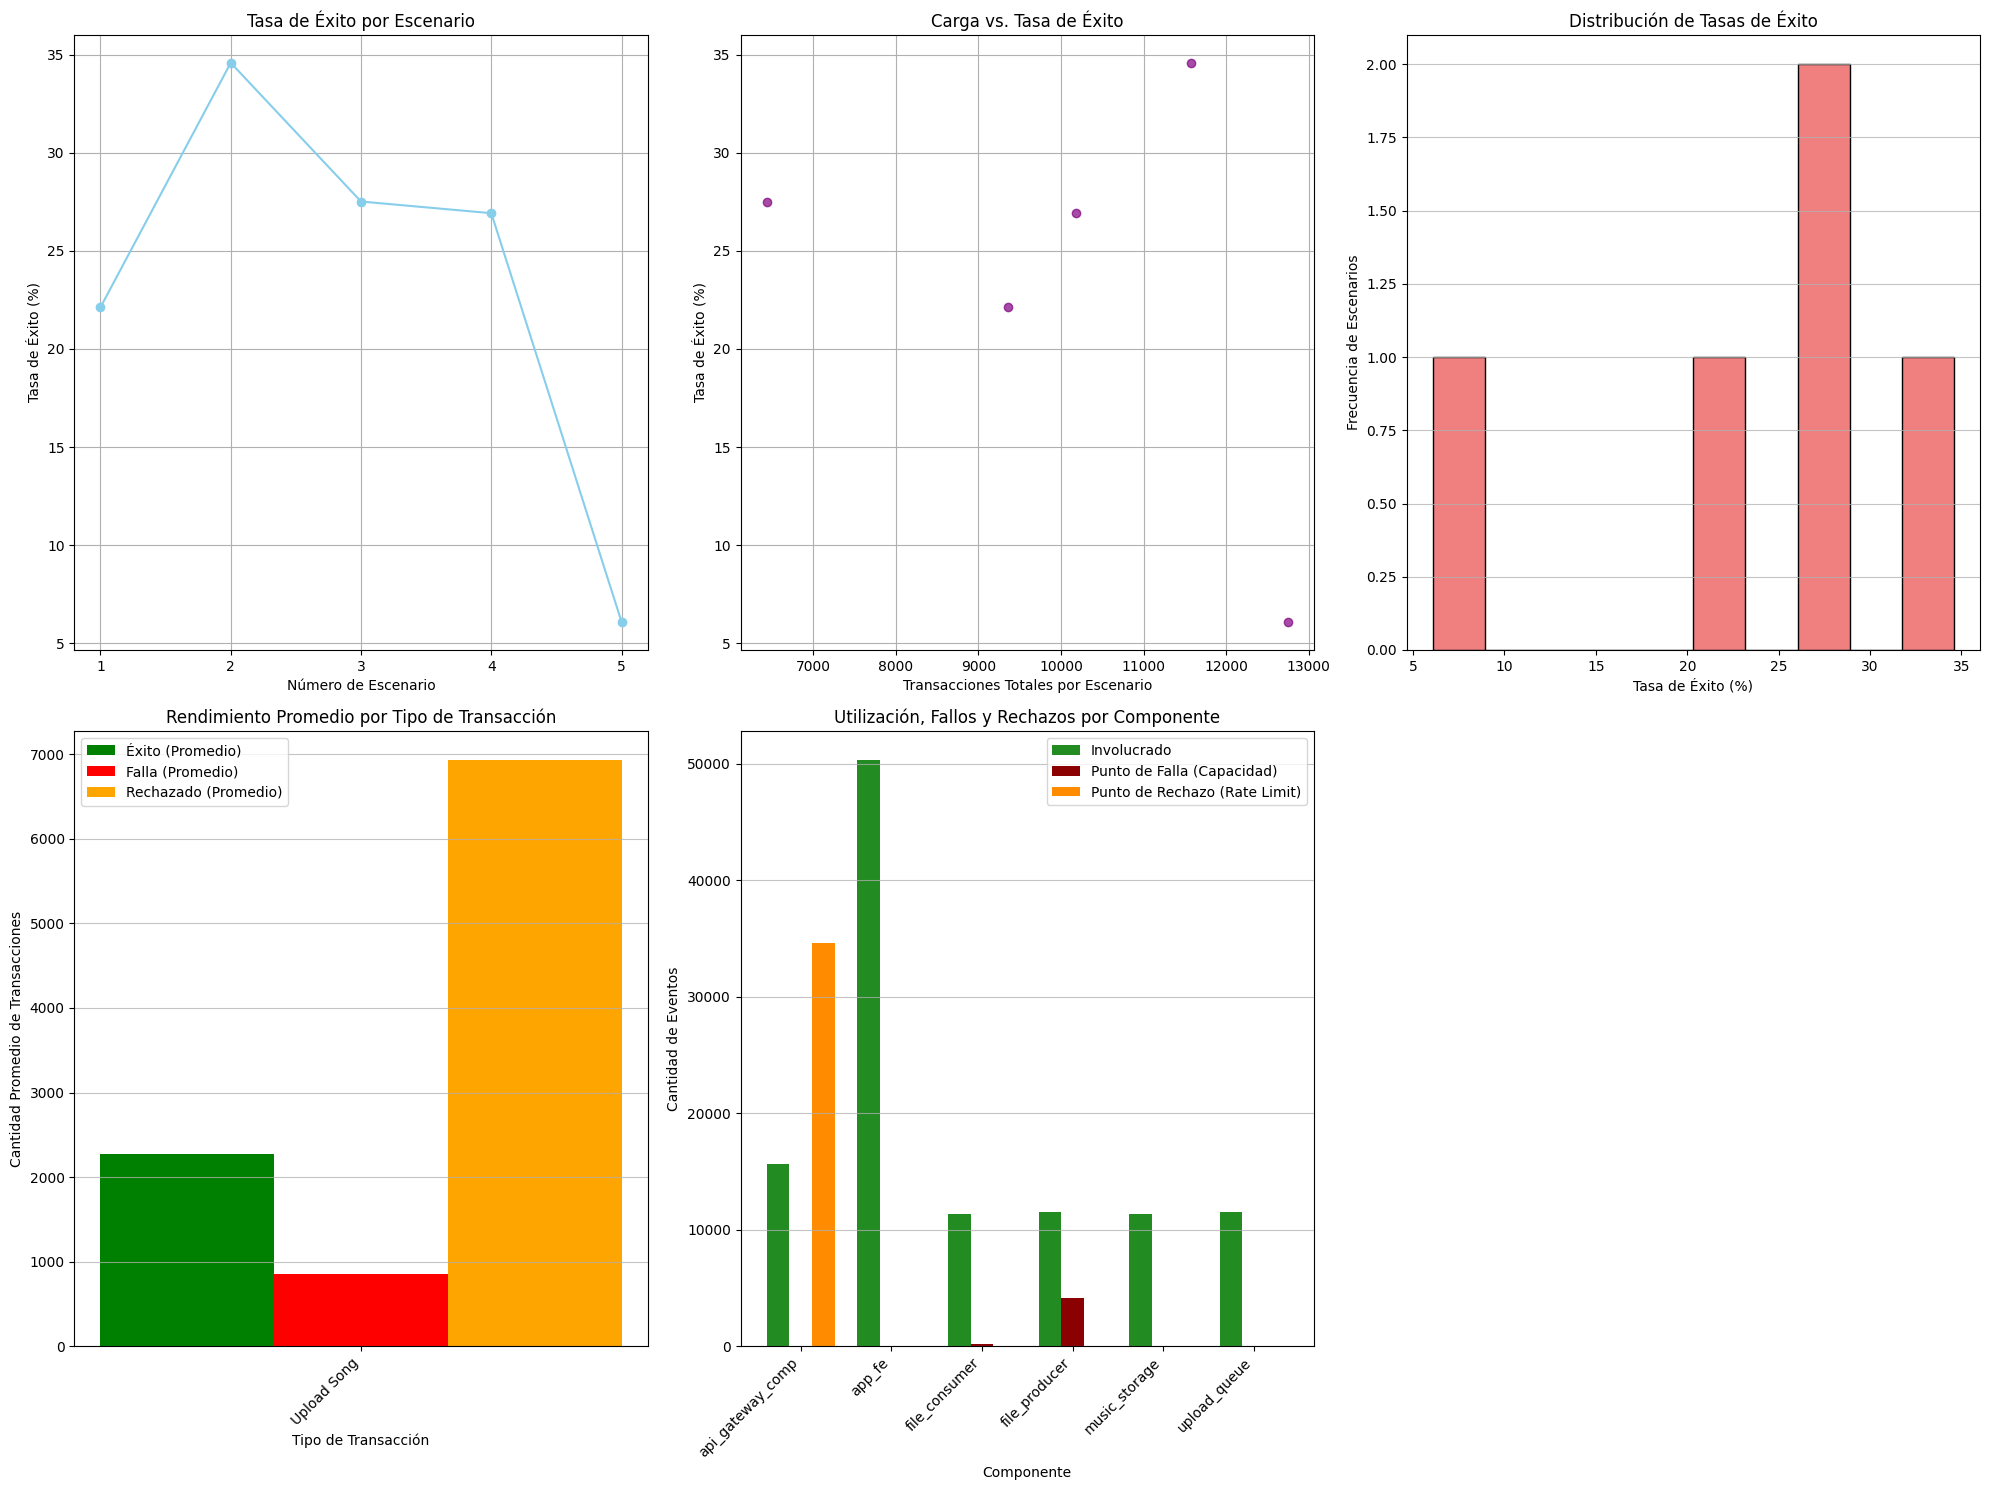

In [ ]:
upload_attack_scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=5000,    # Alto volumen de transacciones
    max_tx_count=15000, # Volumen considerable para estresar
    thread_launch_delay_ms_min=0,     # LLegada muy rápida
    thread_launch_delay_ms_max=1, # Pequeño retraso para simular ráfaga densa
    scenario_transaction_types=['upload_song'] # SOLO transacciones de upload
)
analyze_and_visualize_scenarios(upload_attack_scenario_results)

Y simulamos nuevamente el ataque DDOS general


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 13979 totales, 3877 exitosas, 98 fallidas, 10004 rechazadas (27.73%)
Escenario 2 Completado: 6230 totales, 1660 exitosas, 140 fallidas, 4430 rechazadas (26.65%)
Escenario 3 Completado: 12256 totales, 4355 exitosas, 33 fallidas, 7868 rechazadas (35.53%)
Escenario 4 Completado: 8468 totales, 1097 exitosas, 103 fallidas, 7268 rechazadas (12.95%)
Escenario 5 Completado: 8585 totales, 1119 exitosas, 116 fallidas, 7350 rechazadas (13.03%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 6230 - 13979
Promedio de transacciones exitosas por escenario: 2421.60
Promedio de transacciones fallidas por escenario: 98.00
Promedio de transacciones rechazadas por escenario: 7384.00
Tasa de éxito promedio: 23.18%
Desviación estándar de la tasa de éxito: 8.86%
Tasa de éxito mínima: 12.95%
Tasa de éxito máxima: 35.53%
Retraso de lanzamiento promedio: 0.32 ms


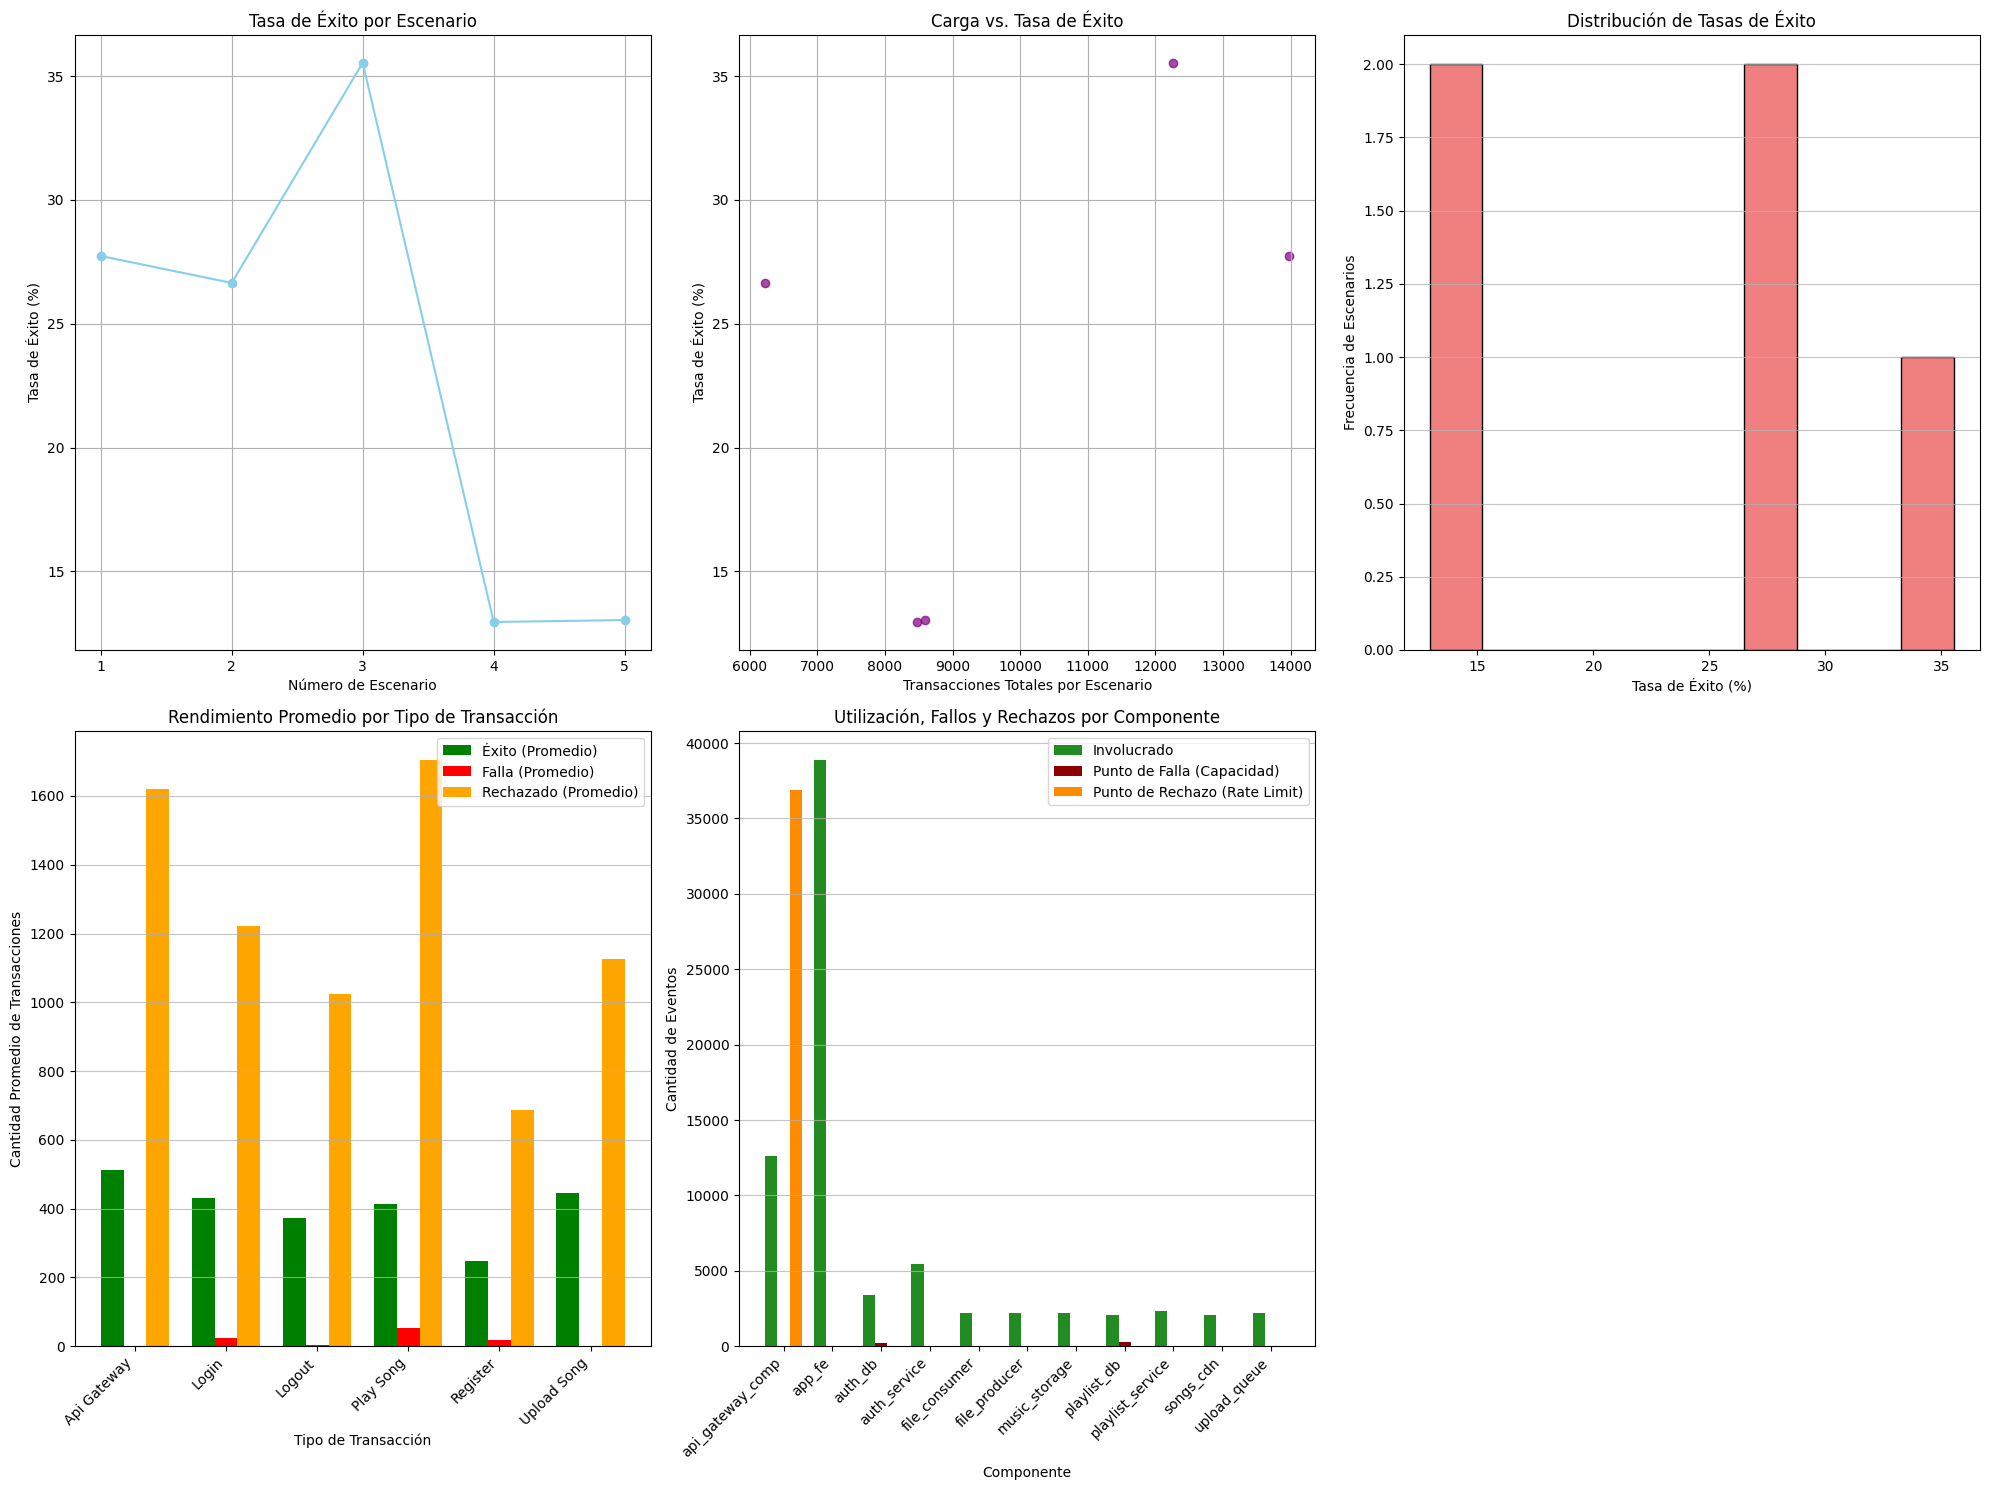

In [ ]:
general_attack_scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=5000,    # Alto volumen de transacciones
    max_tx_count=15000, # Volumen considerable para estresar
    thread_launch_delay_ms_min=0,     # LLegada muy rápida
    thread_launch_delay_ms_max=1, # Pequeño retraso para simular ráfaga densa
    # en este caso se usaran todas las rutas disponibles del sistema
)
analyze_and_visualize_scenarios(general_attack_scenario_results)

# Iteracion 3

## Simulación de la Iteración de Escalabilidad: Evaluación bajo Carga y Capacidad Reducida

Para simular la iteración de escalabilidad y evaluar la robustez del sistema ante una alta demanda, implementaremos una estrategia de prueba específica: **reduciremos artificialmente la capacidad de los componentes clave de la arquitectura**.

Esta reducción controlada nos permitirá simular un escenario de estrés donde los recursos son limitados. Al enviar una carga considerable de solicitudes, observaremos cómo reacciona el sistema y si los componentes con capacidad disminuida pueden soportar el volumen de transacciones concurrentes. El objetivo es identificar cuellos de botella y evaluar la resiliencia del sistema, demostrando la importancia de las estrategias de escalabilidad (como el escalado horizontal y la optimización de recursos) para manejar un gran volumen de tráfico de manera eficiente y fiable en una plataforma de streaming.

Para evaluar el comportamiento del sistema en un entorno limitado, reducimos algunos componentes:


In [ ]:
def setup_architecture():
    components = {}
    graph = nx.DiGraph()

    # Frontend (sin cambios)
    components['app_fe'] = Frontend('app_fe')
    graph.add_node('app_fe', type='frontend')

    components['api_gateway_comp'] = ApiGateway(
        'api_gateway_comp',
        capacity=120,
        rate_limit_per_second=120 # Reducido
    )
    graph.add_node('api_gateway_comp', type='api_gateway')
    graph.add_edge('app_fe', 'api_gateway_comp')

    services = {
        'catalog': ('catalog_service', 'catalog_db', 'elasticsearch'),
        'user': ('user_service', 'user_db', 'postgresql'),
        'auth': ('auth_service', 'auth_db', 'postgresql'),
        'playlist': ('playlist_service', 'playlist_db', 'mongodb'),
        'file_producer': ('file_producer', None, None)
    }

    for service, (svc_name, db_name, db_type) in services.items():
        components[svc_name] = Backend(svc_name, capacity=10) # Reducido
        graph.add_node(svc_name, type='backend')
        graph.add_edge('api_gateway_comp', svc_name)

        if db_name:
            components[db_name] = Database(db_name, db_type, capacity=20) # Reducido
            graph.add_node(db_name, type='database')
            graph.add_edge(svc_name, db_name)

    components['upload_queue'] = Queue('upload_queue', capacity=20)  # Reducido
    graph.add_node('upload_queue', type='queue')

    components['file_consumer'] = Backend('file_consumer', capacity=10)  # Reducido
    graph.add_node('file_consumer', type='backend')

    components['music_storage'] = Bucket('music_storage', capacity=20)  # Reducido
    graph.add_node('music_storage', type='bucket')

    graph.add_edge('file_producer', 'upload_queue')
    graph.add_edge('upload_queue', 'file_consumer')
    graph.add_edge('file_consumer', 'music_storage')

    components['songs_cdn'] = CDN('songs_cdn', capacity=20)  # Reducido
    graph.add_node('songs_cdn', type='cdn')
    graph.add_edge('playlist_service', 'songs_cdn')

    return components, graph


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 779 totales, 120 exitosas, 120 fallidas, 539 rechazadas (15.40%)
Escenario 2 Completado: 1482 totales, 642 exitosas, 278 fallidas, 562 rechazadas (43.32%)
Escenario 3 Completado: 1579 totales, 869 exitosas, 170 fallidas, 540 rechazadas (55.03%)
Escenario 4 Completado: 1134 totales, 150 exitosas, 210 fallidas, 774 rechazadas (13.23%)
Escenario 5 Completado: 1759 totales, 621 exitosas, 348 fallidas, 790 rechazadas (35.30%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 779 - 1759
Promedio de transacciones exitosas por escenario: 480.40
Promedio de transacciones fallidas por escenario: 225.20
Promedio de transacciones rechazadas por escenario: 641.00
Tasa de éxito promedio: 32.46%
Desviación estándar de la tasa de éxito: 16.10%
Tasa de éxito mínima: 13.23%
Tasa de éxito máxima: 55.03%
Retraso de lanzamiento promedio: 3.26 ms


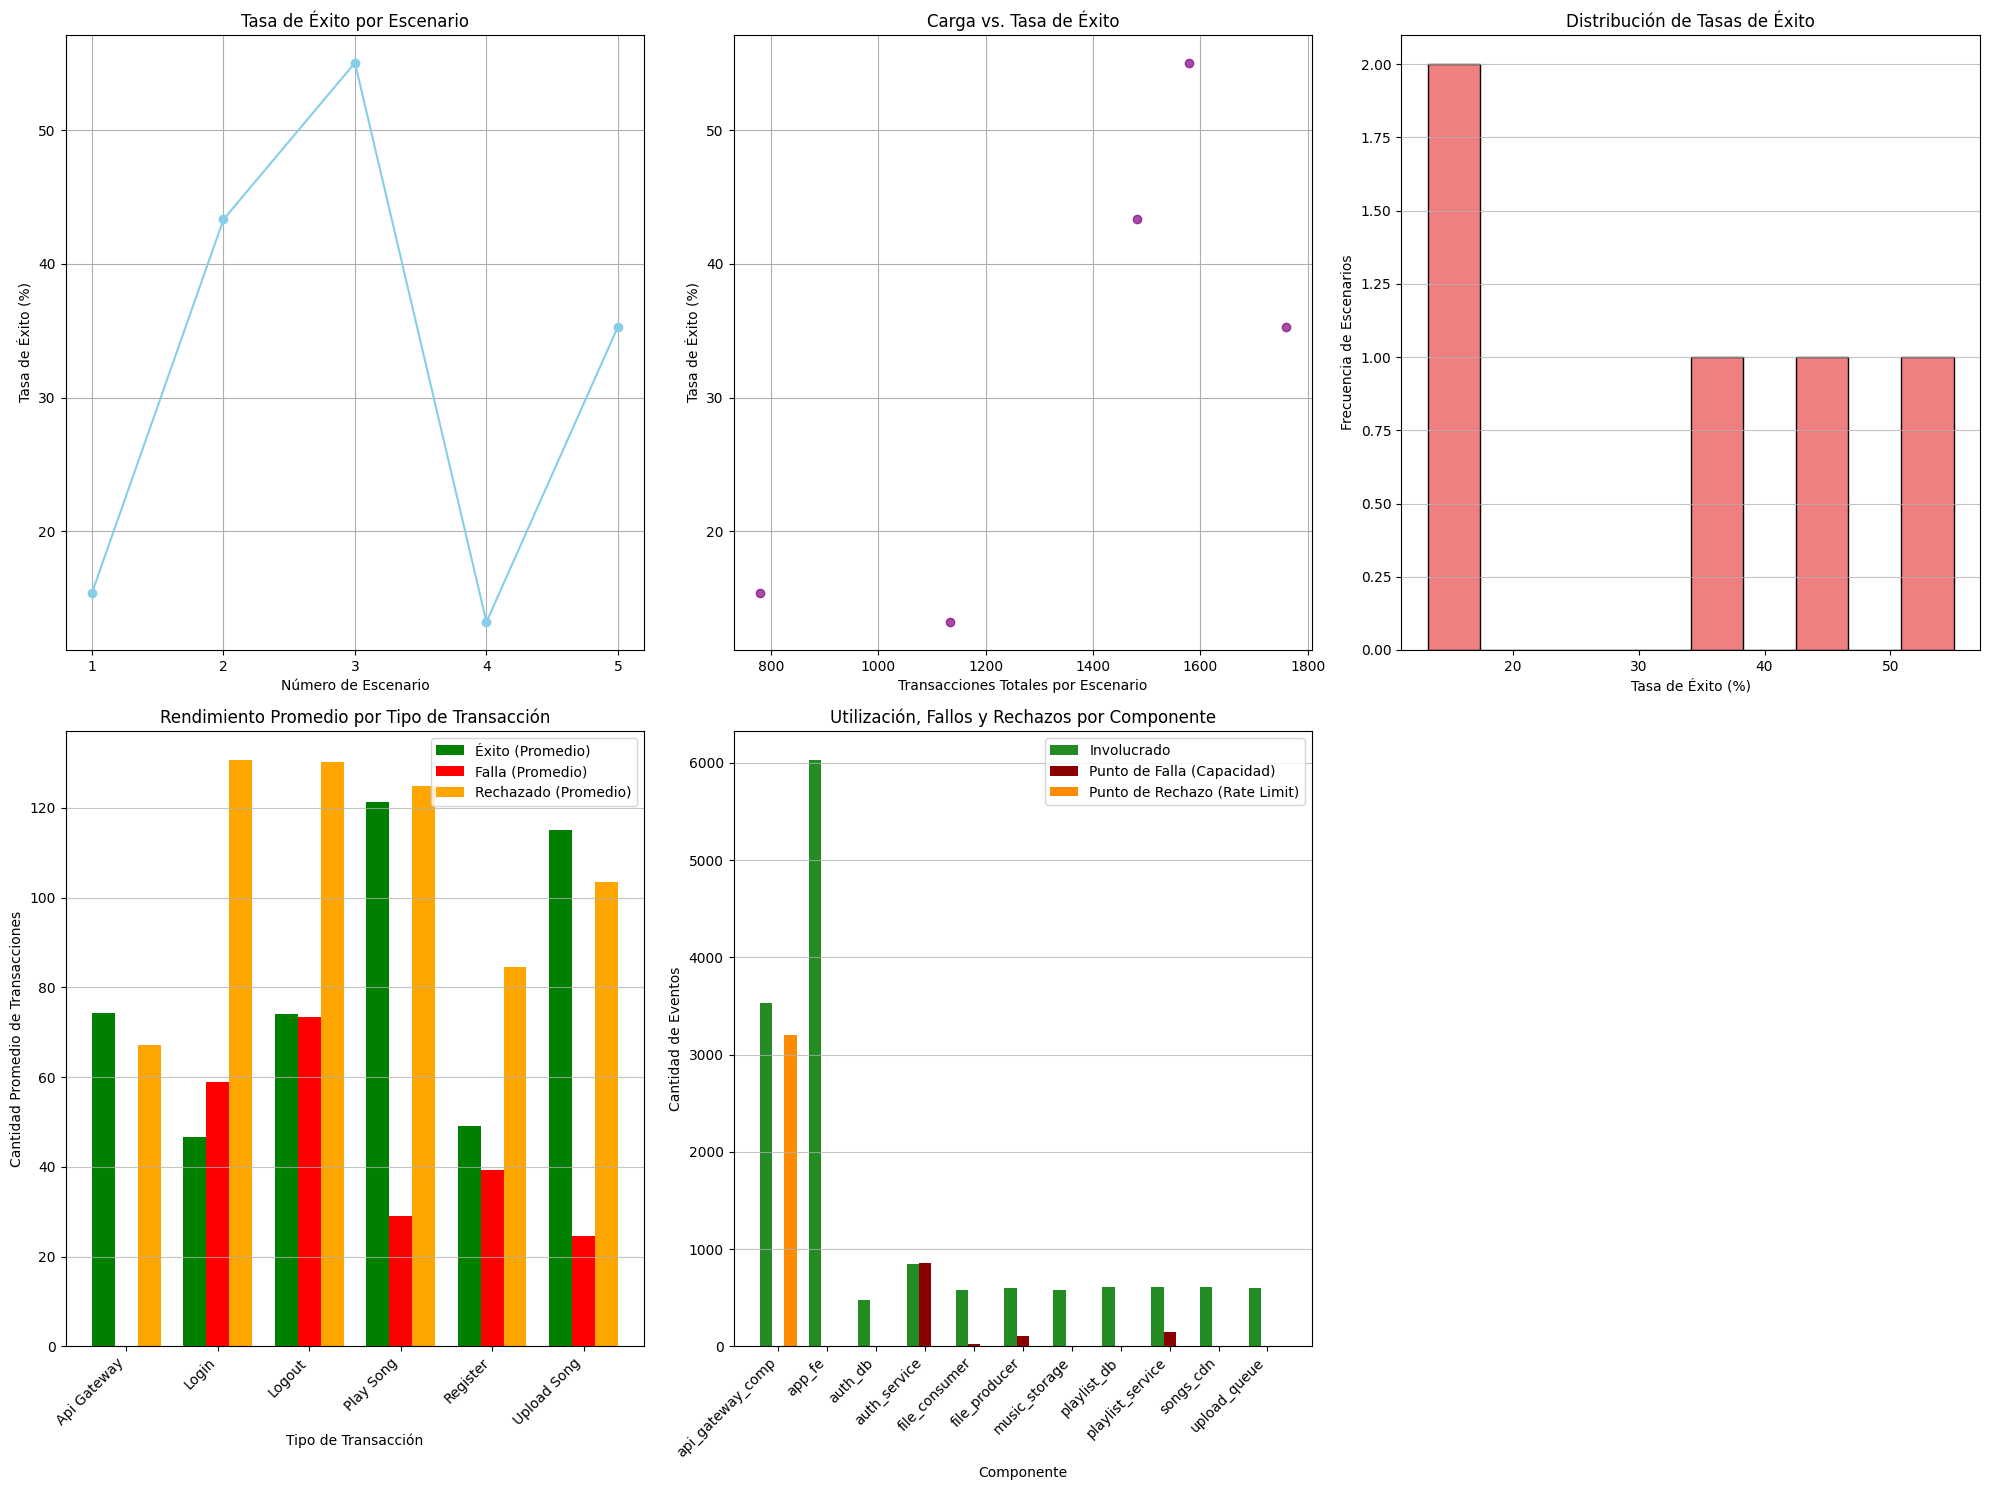

In [ ]:
components, graph = setup_architecture()
scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=200,
    max_tx_count=2000,
    thread_launch_delay_ms_min=1,  # Retraso de 1 a 5 ms entre transacciones
    thread_launch_delay_ms_max=5
)

# Analizar y visualizar los resultados de todos los escenarios
analyze_and_visualize_scenarios(scenario_results)

# Iteracion 4

Se añaden load balancers

In [ ]:
class LoadBalancer(Component):
    def __init__(self, name, targets, capacity=100):
        super().__init__(name, "loadbalancer", capacity)
        self.targets = targets
        self.current_idx = 0

    def get_target(self):
        target = self.targets[self.current_idx % len(self.targets)]
        self.current_idx += 1
        return target
class ApiGwLoadBalancer(Component):
    def __init__(self, name, targets, capacity=250):
        super().__init__(name, "api_gw_loadbalancer", capacity)
        self.targets = targets
        self.current_idx = 0

    def get_target(self):
        target = self.targets[self.current_idx % len(self.targets)]
        self.current_idx += 1
        return target

In [ ]:
def setup_architecture():
    components = {}
    graph = nx.DiGraph()

    # --- Frontend único ---
    components['app_fe'] = Frontend('app_fe')
    graph.add_node('app_fe', type='frontend')

    # --- API Gateway: réplicas y Load Balancer ---
    # Load Balancer para gateway
    components['api_gateway_lb'] = ApiGwLoadBalancer('api_gateway_lb', ['api_gateway_1', 'api_gateway_2'])
    graph.add_node('api_gateway_lb', type='api_gw_loadbalancer')
    graph.add_edge('app_fe', 'api_gateway_lb')

    # Réplicas de API Gateway
    for i in (1, 2):
        name = f'api_gateway_{i}'
        components[name] = ApiGateway(name, capacity=120,rate_limit_per_second=120) # Reducido)
        graph.add_node(name, type='api_gateway')
        graph.add_edge('api_gateway_lb', name)

    # --- Backends y Load Balancers con réplicas ---
    services = {
        'catalog':    ('catalog_service',    'catalog_lb',    'catalog_db',    'elasticsearch'),
        'user':       ('user_service',       'user_lb',       'user_db',       'postgresql'),
        'auth':       ('auth_service',       'auth_lb',       'auth_db',       'postgresql'),
        'playlist':   ('playlist_service',   'playlist_lb',   'playlist_db',   'mongodb'),
        'file_prod':  ('file_producer',      'file_producer_lb', None,           None)
    }

    for svc_key, (svc_base, lb_name, db_name, db_type) in services.items():
        # Crear dos réplicas de backend
        replicas = [f"{svc_base}_1", f"{svc_base}_2"]
        for node in replicas:
            components[node] = Backend(node, capacity=10)
            graph.add_node(node, type='backend')

        # Load Balancer para estas réplicas
        components[lb_name] = LoadBalancer(lb_name, replicas)
        graph.add_node(lb_name, type='loadbalancer')
        # Conectar desde cada réplica de API Gateway
        for gw in ('api_gateway_1', 'api_gateway_2'):
            graph.add_edge(gw, lb_name)
        for node in replicas:
            graph.add_edge(lb_name, node)

        # Base de datos única conectada a cada réplica
        if db_name:
            components[db_name] = Database(db_name, db_type, capacity=  20)
            graph.add_node(db_name, type='database')
            for node in replicas:
                graph.add_edge(node, db_name)

    # --- Cola y consumidor de archivos ---
    components['upload_queue'] = Queue('upload_queue', capacity=20)
    graph.add_node('upload_queue', type='queue')

    components['file_consumer'] = Backend('file_consumer', capacity=10)
    graph.add_node('file_consumer', type='backend')

    components['music_storage'] = Bucket('music_storage', capacity=20)
    graph.add_node('music_storage', type='bucket')

    # Conexiones de producer -> queue -> consumer -> bucket
    graph.add_edge('file_producer_1', 'upload_queue')
    graph.add_edge('file_producer_2', 'upload_queue')
    graph.add_edge('upload_queue', 'file_consumer')
    graph.add_edge('file_consumer', 'music_storage')

    # --- CDN para playlists ---
    components['songs_cdn'] = CDN('songs_cdn', capacity=20)
    graph.add_node('songs_cdn', type='cdn')
    graph.add_edge('playlist_service_1', 'songs_cdn')
    graph.add_edge('playlist_service_2', 'songs_cdn')

    return components, graph

In [ ]:
routes = {
    'play_song': [
        'app_fe', 'api_gateway_lb', 'playlist_lb',
        'playlist_db', 'songs_cdn'
    ],
    'upload_song': [
        'app_fe', 'api_gateway_lb', 'file_producer_lb',
        'upload_queue', 'file_consumer', 'music_storage'
    ],
    'login': [
        'app_fe', 'api_gateway_lb', 'auth_lb',
        'auth_db'
    ],
    'register': [
        'app_fe', 'api_gateway_lb', 'auth_lb',
        'auth_db'
    ],
    'logout': [
        'app_fe', 'api_gateway_lb', 'auth_lb'
    ]
}

In [ ]:
def draw_architecture(graph):
    plt.figure(figsize=(15, 10))

    layer_order = [
        "frontend",
        "api_gw_loadbalancer",
        "api_gateway",
        "loadbalancer",
        "backend",
        ("mqtp", "database"),
        ("cdn", "bucket")
    ]

    layer_map = {}
    for i, layer in enumerate(layer_order):
        if isinstance(layer, str):
            layer_map[layer] = i
        else:
            for t in layer:
                layer_map[t] = i

    G = nx.DiGraph()
    layers = {}

    for node, comp_type in graph.nodes(data=True):
        G.add_node(node, type=comp_type)
        layer_index = layer_map.get(comp_type['type'], len(layer_order))  # fallback to bottom
        layers.setdefault(layer_index, []).append(node)

    for src, tgt, label in graph.edges(data=True):
        G.add_edge(src, tgt, label=label)

    # Compute positions
    pos = {}
    x_gap = 1.5
    y_gap = -2

    for layer_index in sorted(layers):
        nodes = layers[layer_index]
        for i, node in enumerate(nodes):
            pos[node] = (i * x_gap, layer_index * y_gap)


    color_map = {
        'frontend': 'lightblue',
        'api_gateway': 'orange',
        'api_gw_loadbalancer': 'yellow',
        'loadbalancer': 'yellow',
        'backend': 'lightgreen',
        'database': 'pink',
        'queue': 'gray',
        'bucket': 'purple',
        'cdn': 'red'
    }

    node_colors = [color_map[data['type']] for _, data in graph.nodes(data=True)]

    nx.draw(graph, pos, with_labels=True, node_color=node_colors,
            node_size=2500, font_size=8, arrows=True)
    plt.title("Spotify like")
    plt.show()


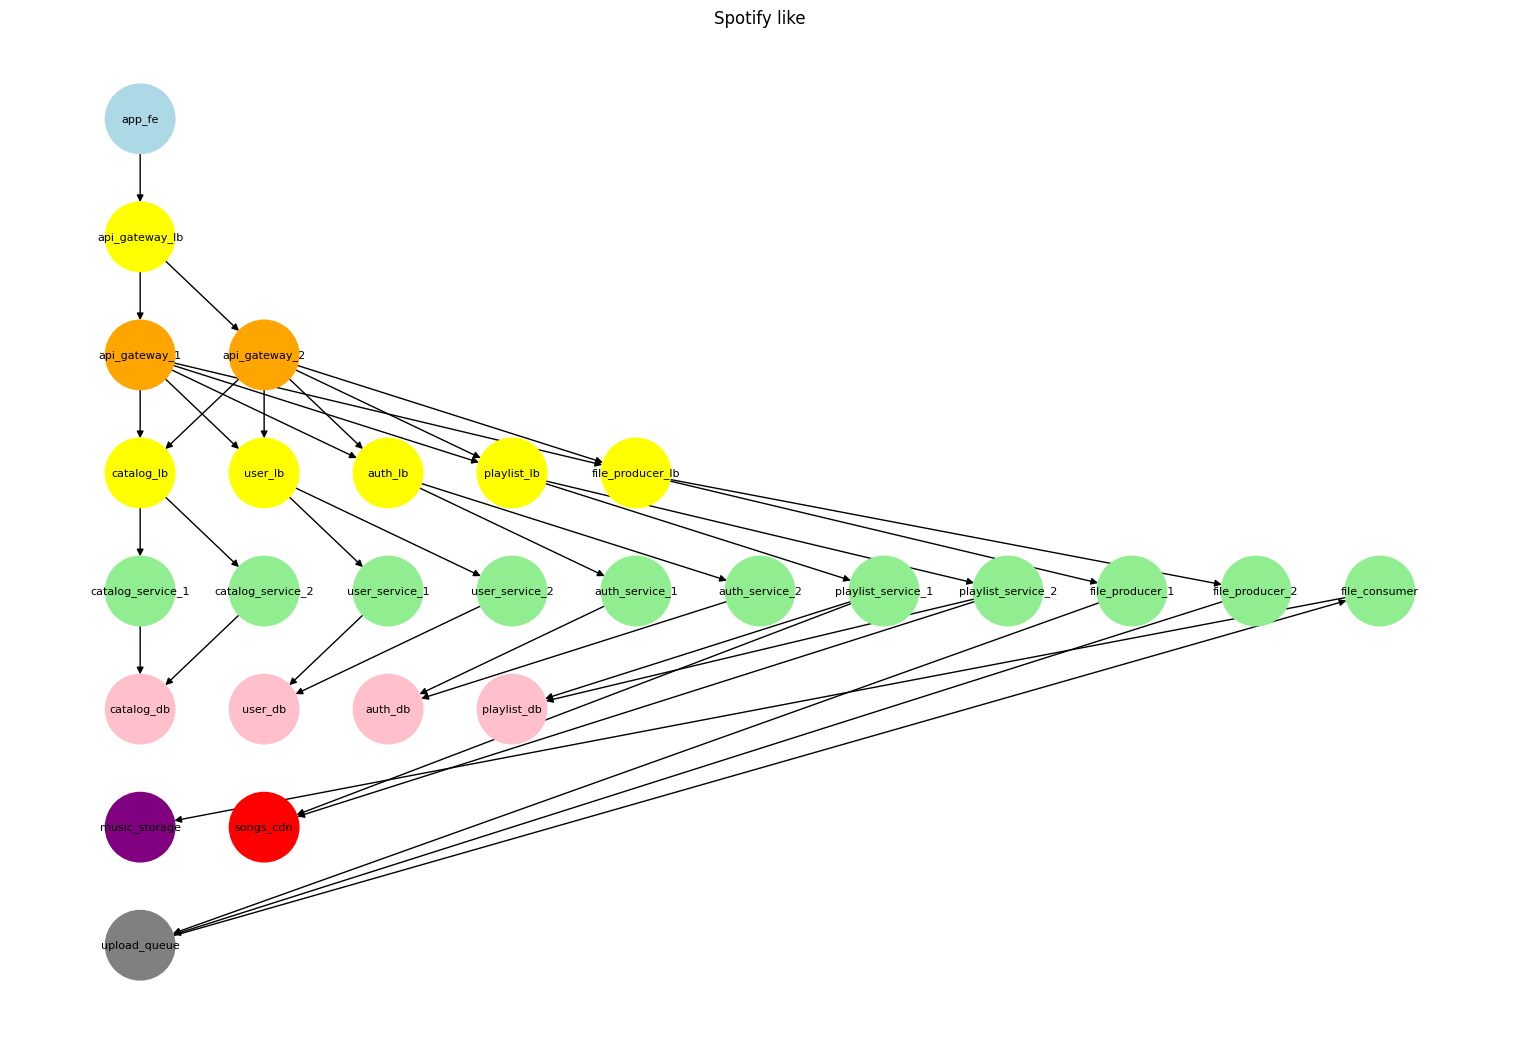


=== Iniciando Simulación de 5 Escenarios ===
Escenario 1 Completado: 606 totales, 534 exitosas, 72 fallidas, 0 rechazadas (88.12%)
Escenario 2 Completado: 1335 totales, 1211 exitosas, 124 fallidas, 0 rechazadas (90.71%)
Escenario 3 Completado: 1957 totales, 1688 exitosas, 269 fallidas, 0 rechazadas (86.25%)
Escenario 4 Completado: 1701 totales, 1563 exitosas, 138 fallidas, 0 rechazadas (91.89%)
Escenario 5 Completado: 384 totales, 347 exitosas, 37 fallidas, 0 rechazadas (90.36%)

=== Análisis Consolidado de Escenarios ===
Número total de escenarios simulados: 5
Rango de transacciones por escenario: 384 - 1957
Promedio de transacciones exitosas por escenario: 1068.60
Promedio de transacciones fallidas por escenario: 128.00
Promedio de transacciones rechazadas por escenario: 0.00
Tasa de éxito promedio: 89.47%
Desviación estándar de la tasa de éxito: 2.02%
Tasa de éxito mínima: 86.25%
Tasa de éxito máxima: 91.89%
Retraso de lanzamiento promedio: 3.02 ms


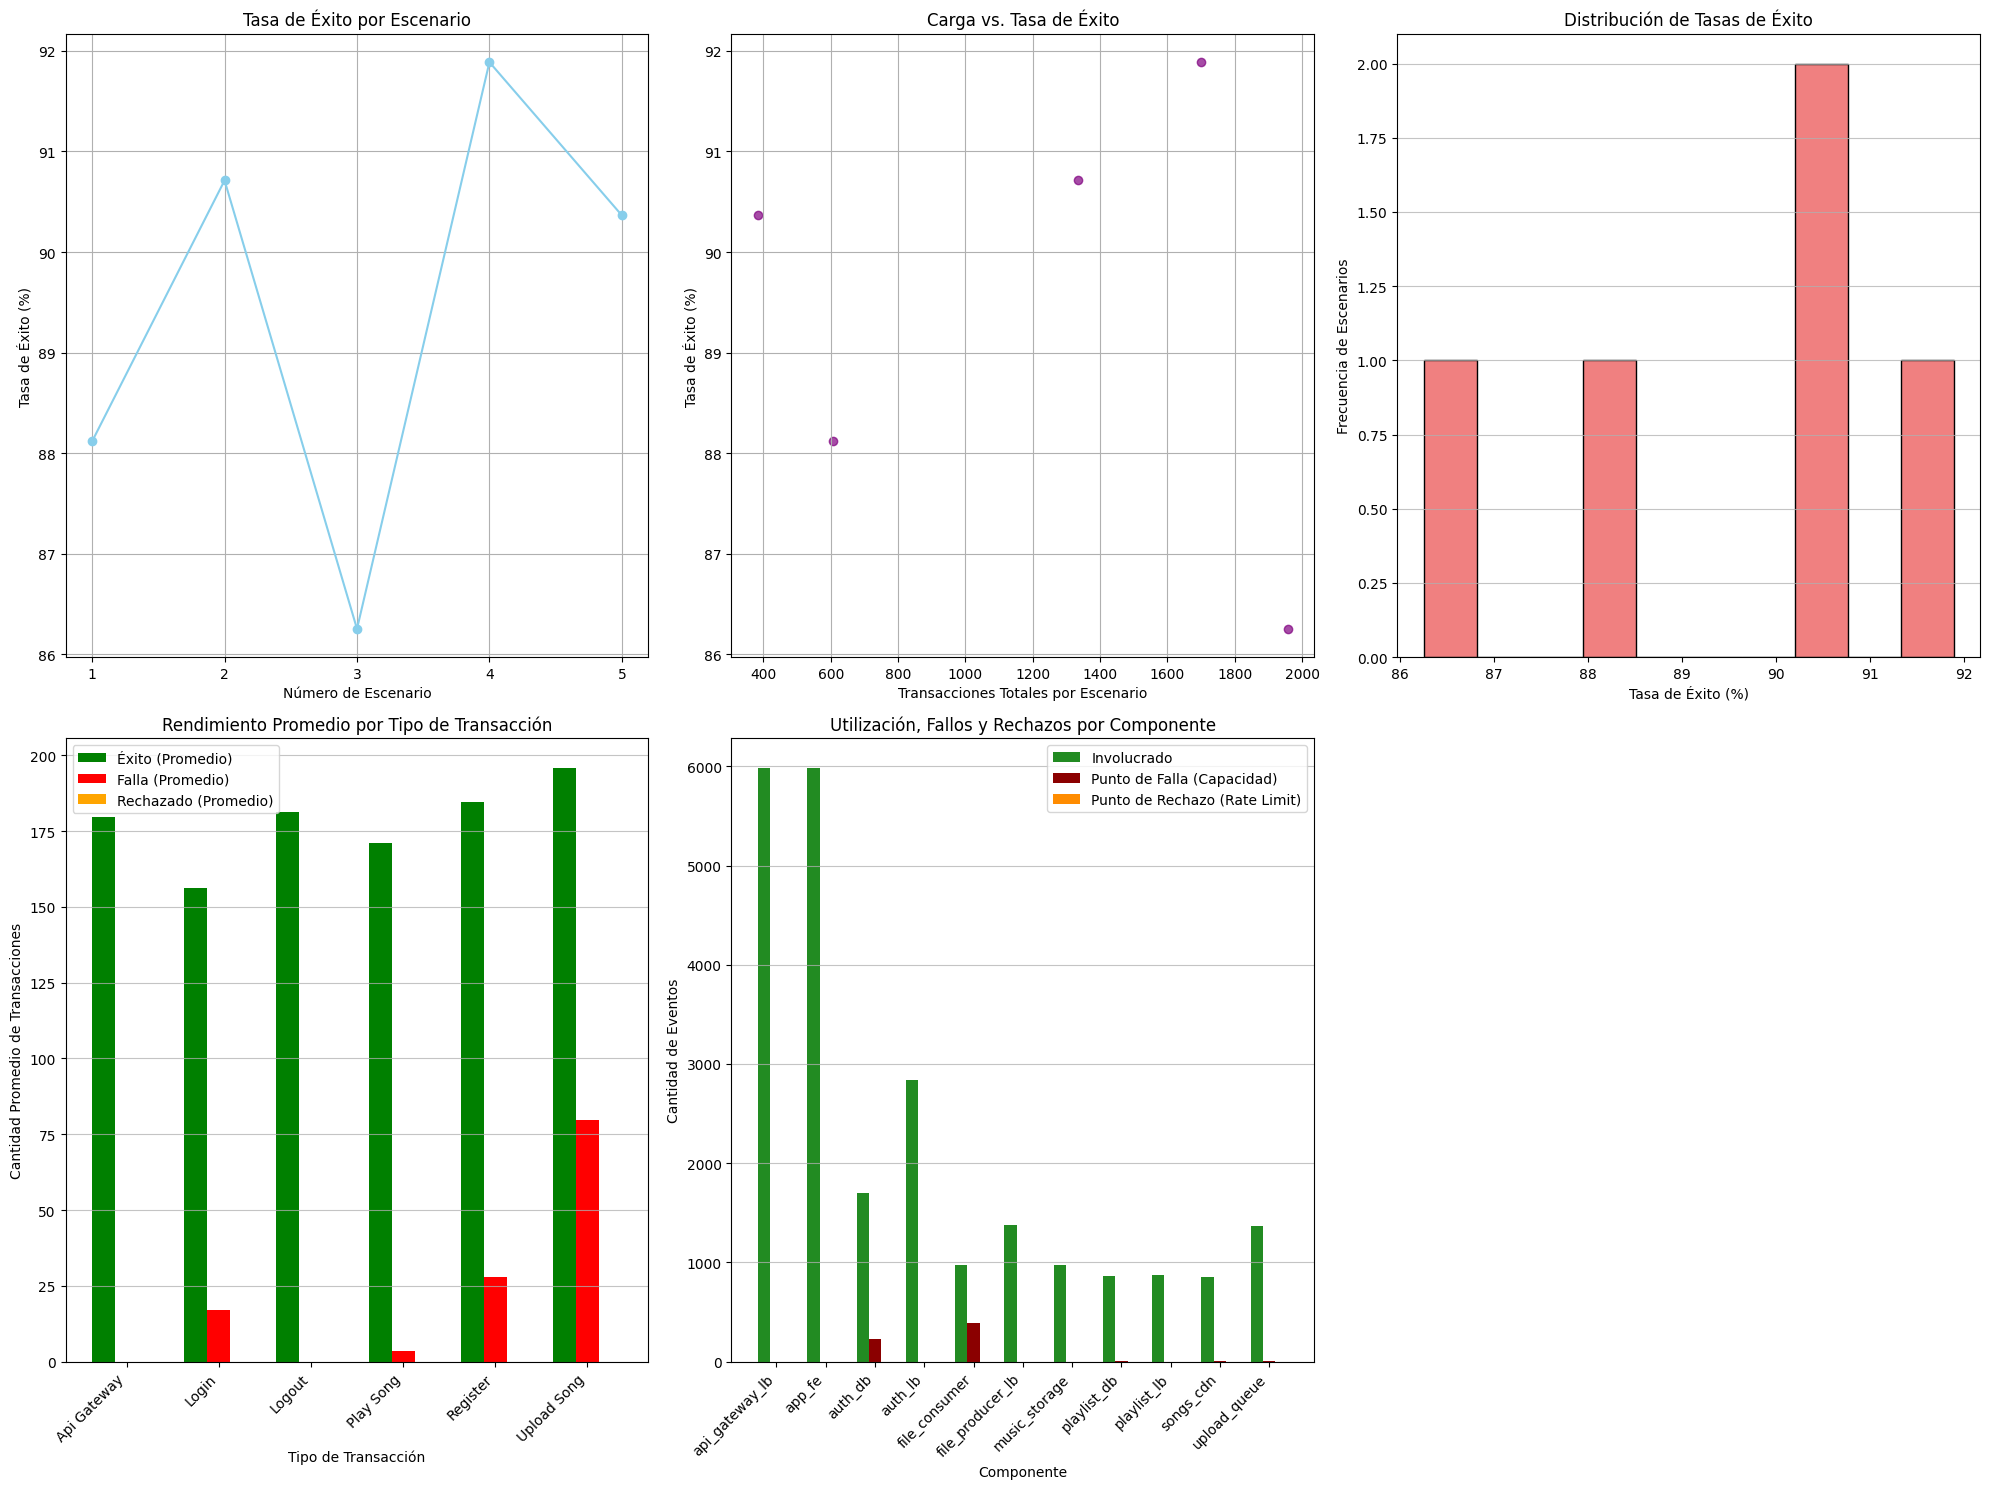

In [ ]:
components, graph = setup_architecture()

# Dibuja la arquitectura ahora con los load balancer y varios servicios agregados
draw_architecture(graph)
scenario_results = run_multi_scenario_simulation(
    components,
    num_scenarios=5,
    min_tx_count=200,
    max_tx_count=2000,
    thread_launch_delay_ms_min=1,  # Retraso de 1 a 5 ms entre transacciones
    thread_launch_delay_ms_max=5
)

# Analizar y visualizar los resultados de todos los escenarios
analyze_and_visualize_scenarios(scenario_results)